# Sentiment Analysis and Embeddings Exploration

This notebook provides an in-depth analysis of sentiment scores and embeddings for news datasets. It includes the following sections:

1. **Sentiments**: Analysis of sentiment scores (VADER and roBERTa) for stock news and fake news datasets, including their distributions, correlations, and differences.
2. **Embeddings**: Exploration of embeddings generated using various models (Word2Vec, BERT, etc.) for stock news and fake news datasets.
3. **Time Series**: Visualization of sentiment trends and stock prices over time.

In [1]:
# Standard libraries
import pandas as pd
import os

# Enable auto-reload for modules during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Custom libraries
from nlp_scripts import eda as eda
from nlp_scripts import data_check as ck
from nlp_scripts import nlp as nlp

### Sentiments

In [2]:
# Data folder
data_folder = '../data/sentiments'

# Reading the dataset
news_dict_sent = nlp.load_dataframes_news_from_folder(data_folder, startswith = 'news_', key_place = 1, endswith = '_ready.csv')
fake_news_dict_sent = nlp.load_dataframes_fake_news_from_folder(data_folder, endswith = 'g_roberta_ready.csv', key_place = 2)

In [3]:
# Lets check the columns for the AAPL dataframe
news_dict_sent['AAPL'].head(2)

date                                              title  \
0  2019-12-11  One of the top Apple 5 analysts predicts next ...   
1  2019-12-11         Microsoft Stock Poised for a Positive 2020   

            source                                 text_column_tokens  \
0  Markets Insider  ['one', 'of', 'the', 'top', 'apple', '5', 'ana...   
1  Markets Insider  ['microsoft', 'stock', 'poised', 'for', 'a', '...   

                            text_without_puntutation  \
0  ['one', 'of', 'the', 'top', 'apple', '5', 'ana...   
1  ['microsoft', 'stock', 'poised', 'for', 'a', '...   

                                         lemmatizers  \
0  ['one', 'of', 'the', 'top', 'apple', '5', 'ana...   
1  ['microsoft', 'stock', 'poise', 'for', 'a', 'p...   

                                  without_stop_words  \
0  ['one', 'top', 'apple', '5', 'analyst', 'predi...   
1  ['microsoft', 'stock', 'poise', 'positive', '2...   

                                         text_column  compound_score  \
0  one top apple 5 analyst predicts next year 5g ...          0.2023   
1                microsoft stock poise positive 2020          0.5574   

   positive_score  neutral_score  negative_score  roberta_neg  roberta_neu  \
0           0.114          0.886             0.0     0.006927     0.285839   
1           0.474          0.526             0.0     0.003582     0.209597   

   roberta_pos  roberta_sentiment       joy     anger      fear   sadness  \
0     0.707234                  2  0.049675  0.010868  0.014051  0.310383   
1     0.786821                  2  0.188978  0.010624  0.009068  0.010865   

    disgust  surprise   neutral  sentiment_label  sentiment_score  
0  0.001212  0.391046  0.222764                2         0.783929  
1  0.003118  0.064486  0.712860                2         0.882640

In [4]:
# Lets check the columns for the AAPL dataframe
fake_news_dict_sent['training'].head(2)

fake_news                                              title  \
0          0  donald trump sends out embarrassing new year‚s...   
1          0  drunk bragging trump staffer started russian c...   

                                  text_column_tokens  \
0  ['donald', 'trump', 'sends', 'out', 'embarrass...   
1  ['drunk', 'bragging', 'trump', 'staffer', 'sta...   

                            text_without_puntutation  \
0  ['donald', 'trump', 'sends', 'out', 'embarrass...   
1  ['drunk', 'bragging', 'trump', 'staffer', 'sta...   

                                         lemmatizers  \
0  ['donald', 'trump', 'sends', 'out', 'embarrass...   
1  ['drunk', 'bragging', 'trump', 'staffer', 'sta...   

                                  without_stop_words  \
0  ['donald', 'trump', 'sends', 'embarrass', 'new...   
1  ['drunk', 'bragging', 'trump', 'staffer', 'sta...   

                                         text_column  compound_score  \
0  donald trump sends embarrass new eve message d...         -0.5994   
1  drunk bragging trump staffer start russian col...         -0.3400   

   positive_score  neutral_score  negative_score  roberta_neg  roberta_neu  \
0             0.0          0.550           0.450     0.771130     0.218655   
1             0.0          0.745           0.255     0.514261     0.467208   

   roberta_pos  roberta_sentiment       joy     anger      fear   sadness  \
0     0.010215                  0  0.002908  0.088452  0.109574  0.088291   
1     0.018531                  0  0.010220  0.437211  0.237585  0.022953   

    disgust  surprise   neutral  sentiment_label  sentiment_score  
0  0.126510  0.109849  0.474416                0         0.971903  
1  0.014639  0.015434  0.261959                0         0.493148

In [5]:
# Let's check the dataframes for missing values 
for key, df in news_dict_sent.items():
    print(f"Missing values in {key} dataframe:")
    ck.check_null(df)

for key, df in fake_news_dict_sent.items():
    print(f"Missing values in {key} dataframe:")
    ck.check_null(df)    

Missing values in AAPL dataframe:

Count of null values:
date                        0
title                       0
source                      0
text_column_tokens          0
text_without_puntutation    0
lemmatizers                 0
without_stop_words          0
text_column                 0
compound_score              0
positive_score              0
neutral_score               0
negative_score              0
roberta_neg                 0
roberta_neu                 0
roberta_pos                 0
roberta_sentiment           0
joy                         0
anger                       0
fear                        0
sadness                     0
disgust                     0
surprise                    0
neutral                     0
sentiment_label             0
sentiment_score             0
dtype: int64

Count of missing() values:
date                        0
title                       0
source                      0
text_column_tokens          0
text_without_puntutation    0
le

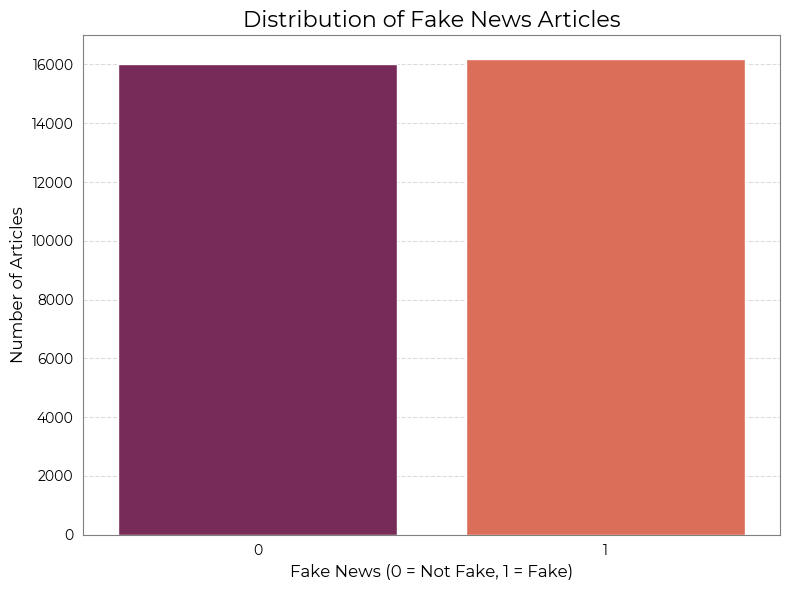

In [6]:
# Distribution if fake news in the training set
eda.fake_news_distribution(fake_news_dict_sent['training'])

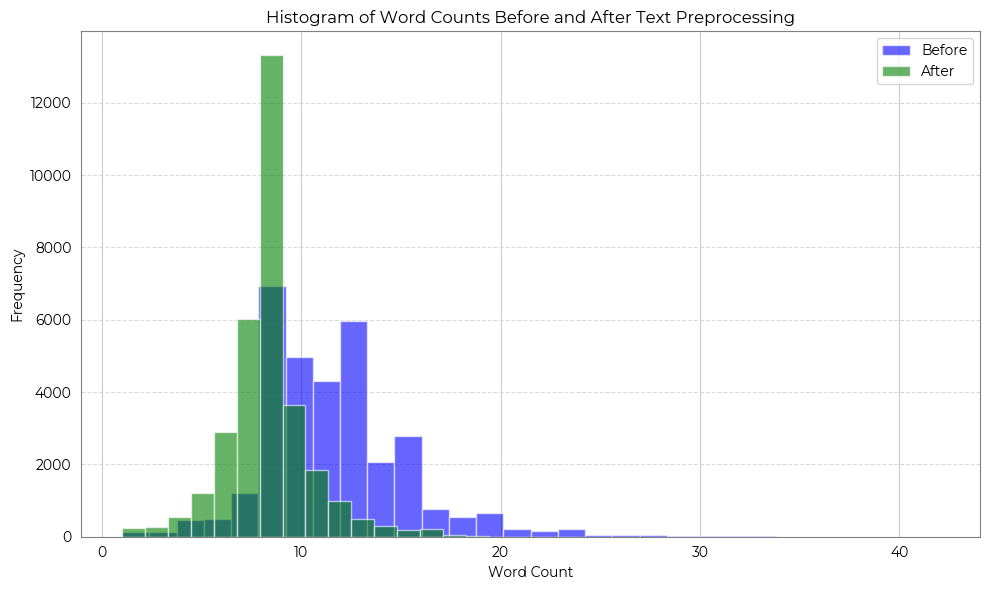

In [7]:

eda.plot_title_word_count_histogram(fake_news_dict_sent['training'], title_column='title', bins=30)

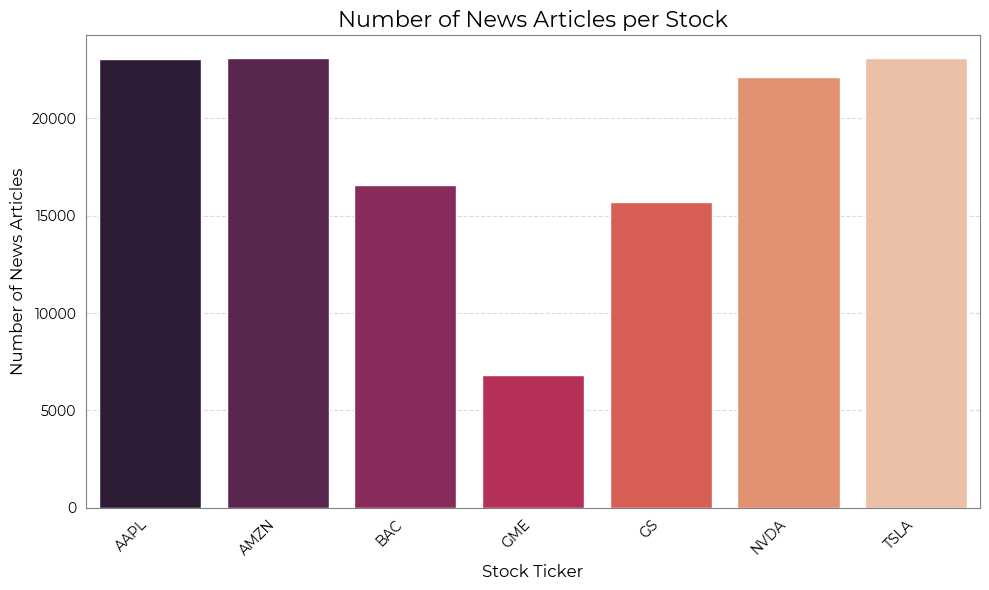

In [8]:
# Distribution of stocks news in the data
eda.plot_news_per_stock(news_dict_sent)

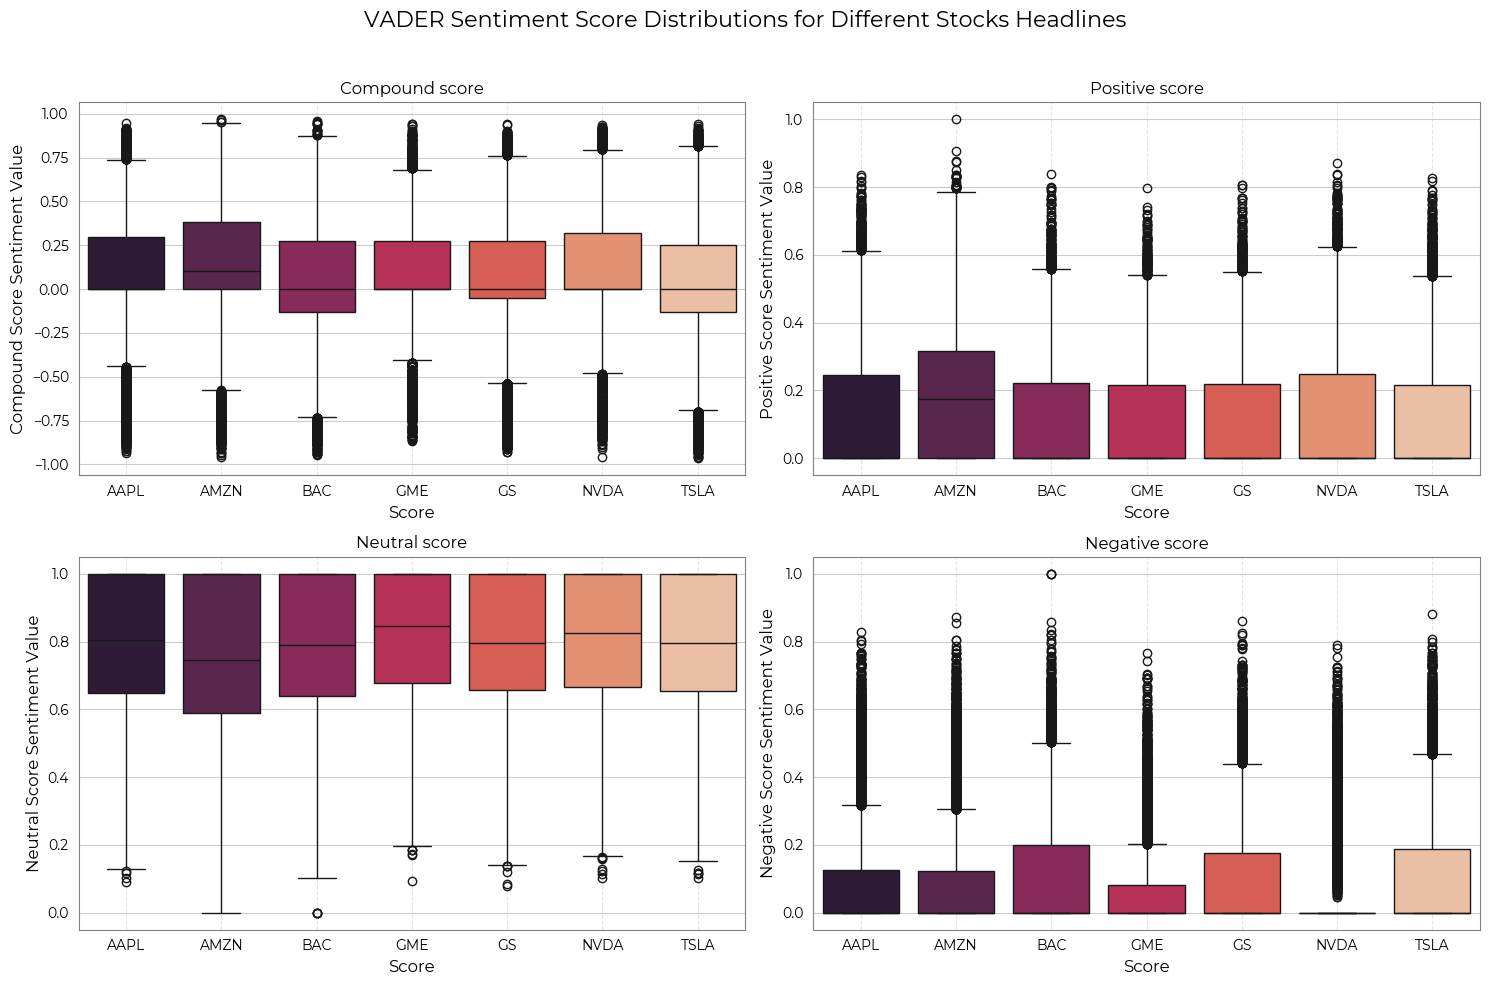

In [9]:
# Plot the vader sentiment scores for the news DataFrames
eda.plot_sentiment_scores_for_stock(news_dict_sent)

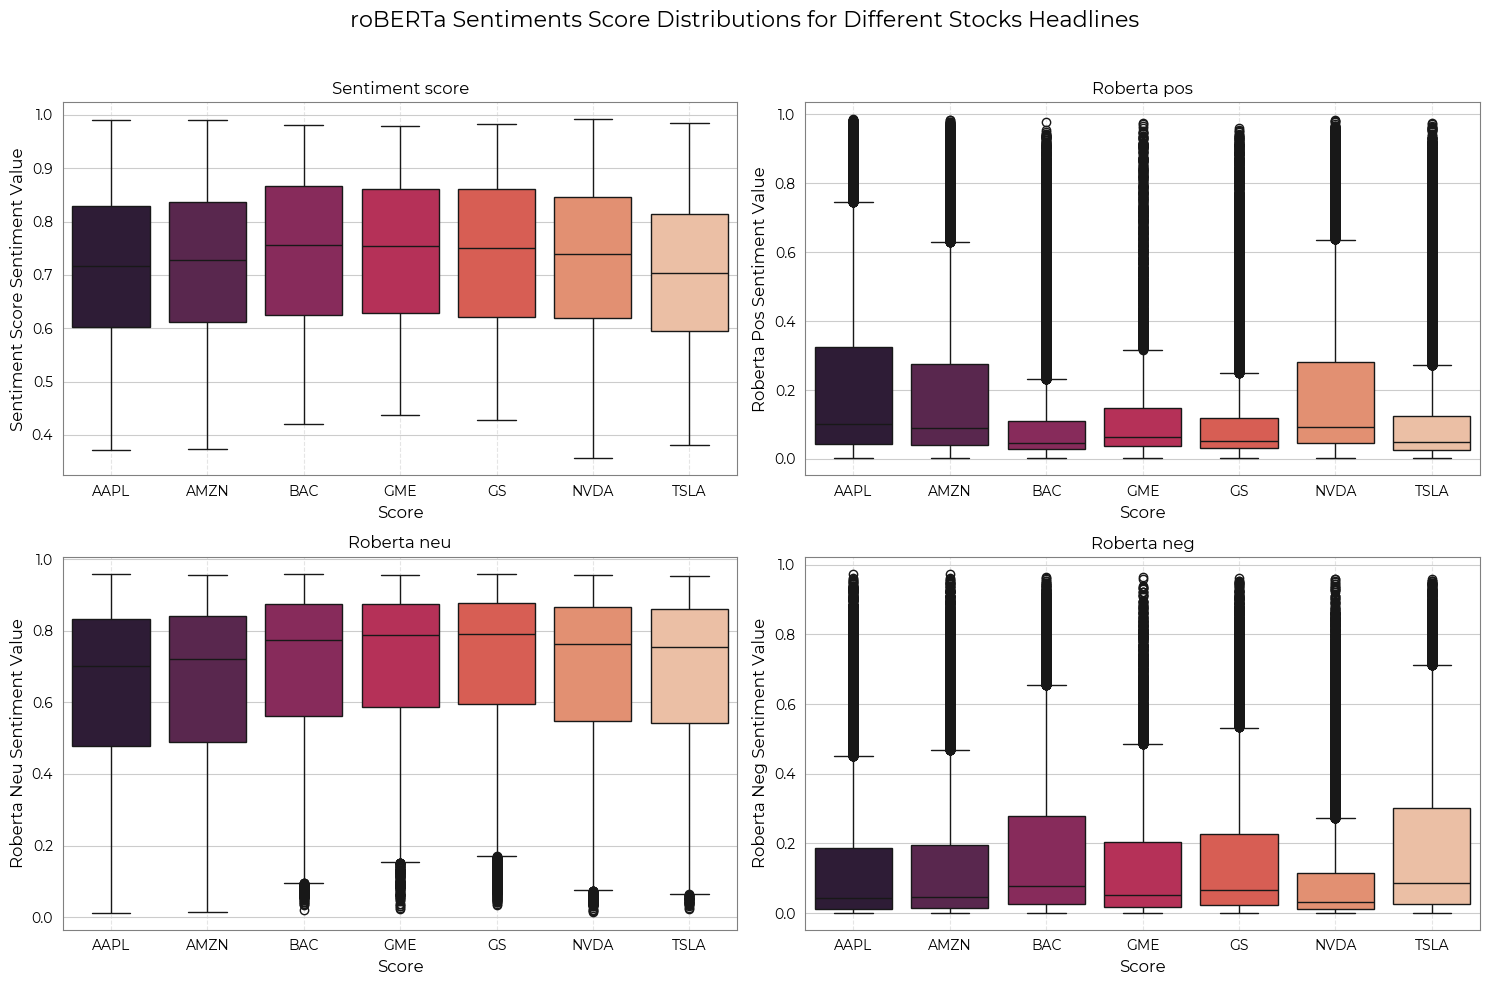

In [10]:
# Plot the roBERTa sentiment scores for the news DataFrames
eda.plot_sentiment_scores_for_stock_roberta(news_dict_sent)

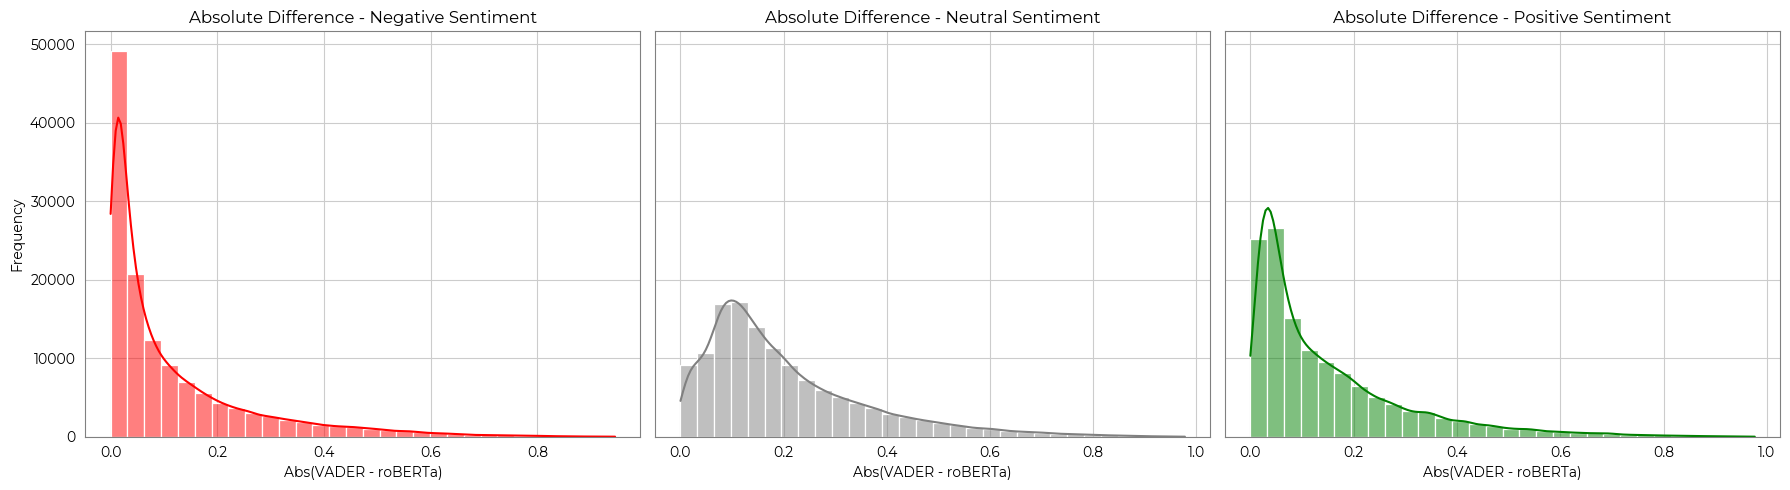

In [11]:
# Difference in Vader and roBERTa sentiment scores for the stocks news DataFrames
eda.plot_sentiment_difference_histograms(news_dict_sent)

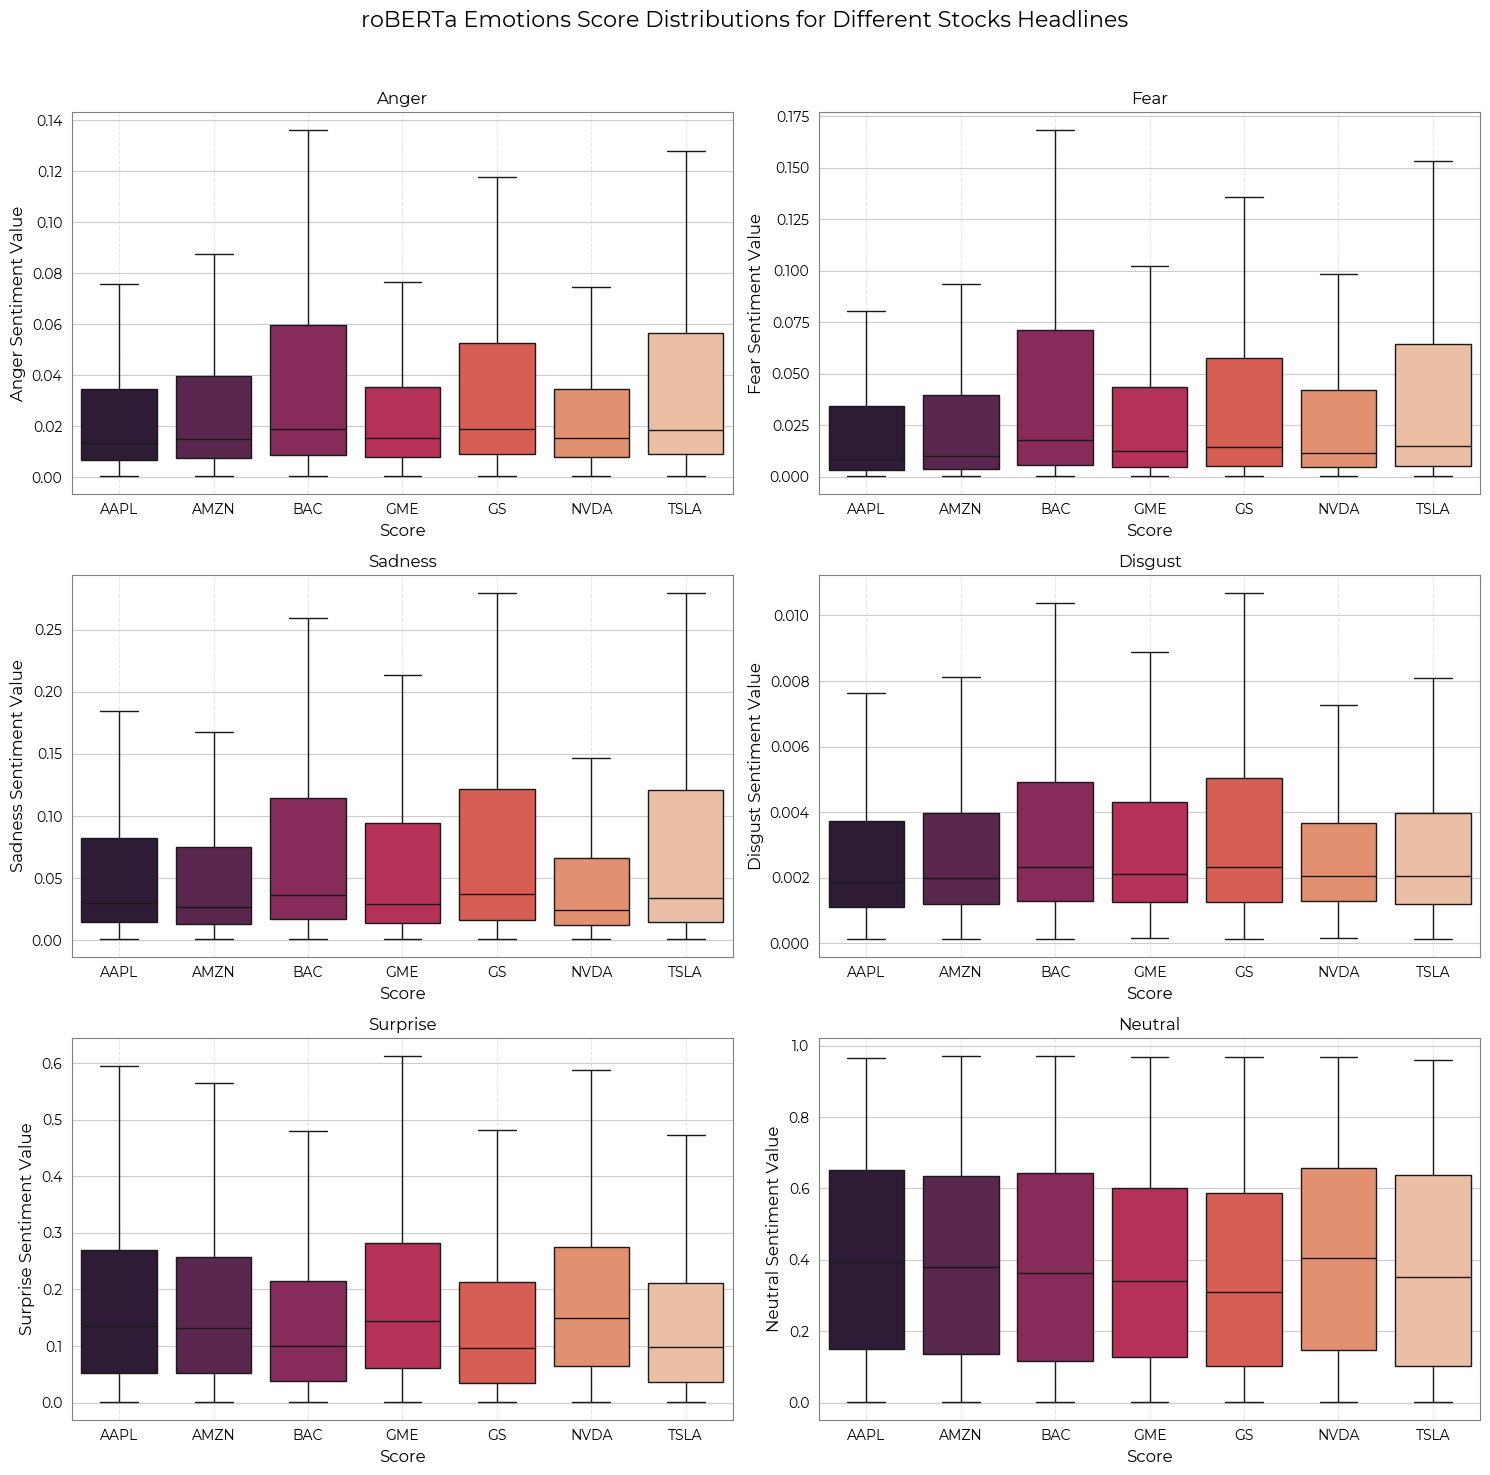

In [12]:
# Emotions distribution for the stocks news DataFrames
eda.plot_sentiment_scores_for_stock_roberta(news_dict_sent, score_columns = ['anger', 'fear', 'sadness', 'disgust', 'surprise', 'neutral'], word='emotions', showfliers=False)

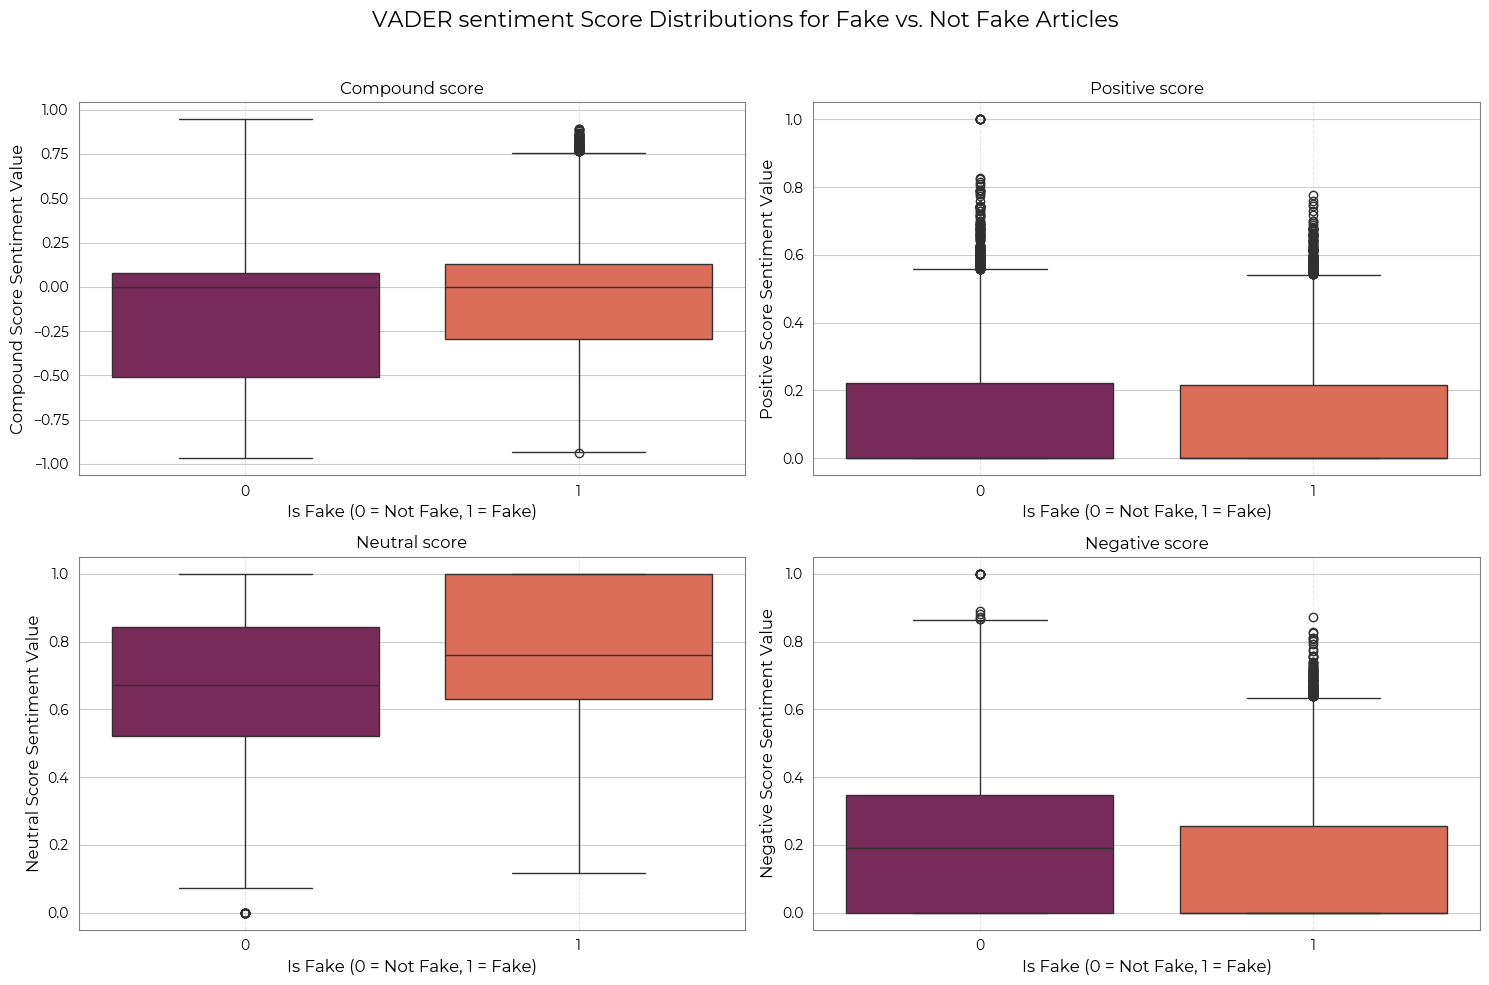

In [13]:
# Plot the VADER sentiment scores for the fake news DataFrames
eda.plot_sentiment_scores_for_fake(fake_news_dict_sent)

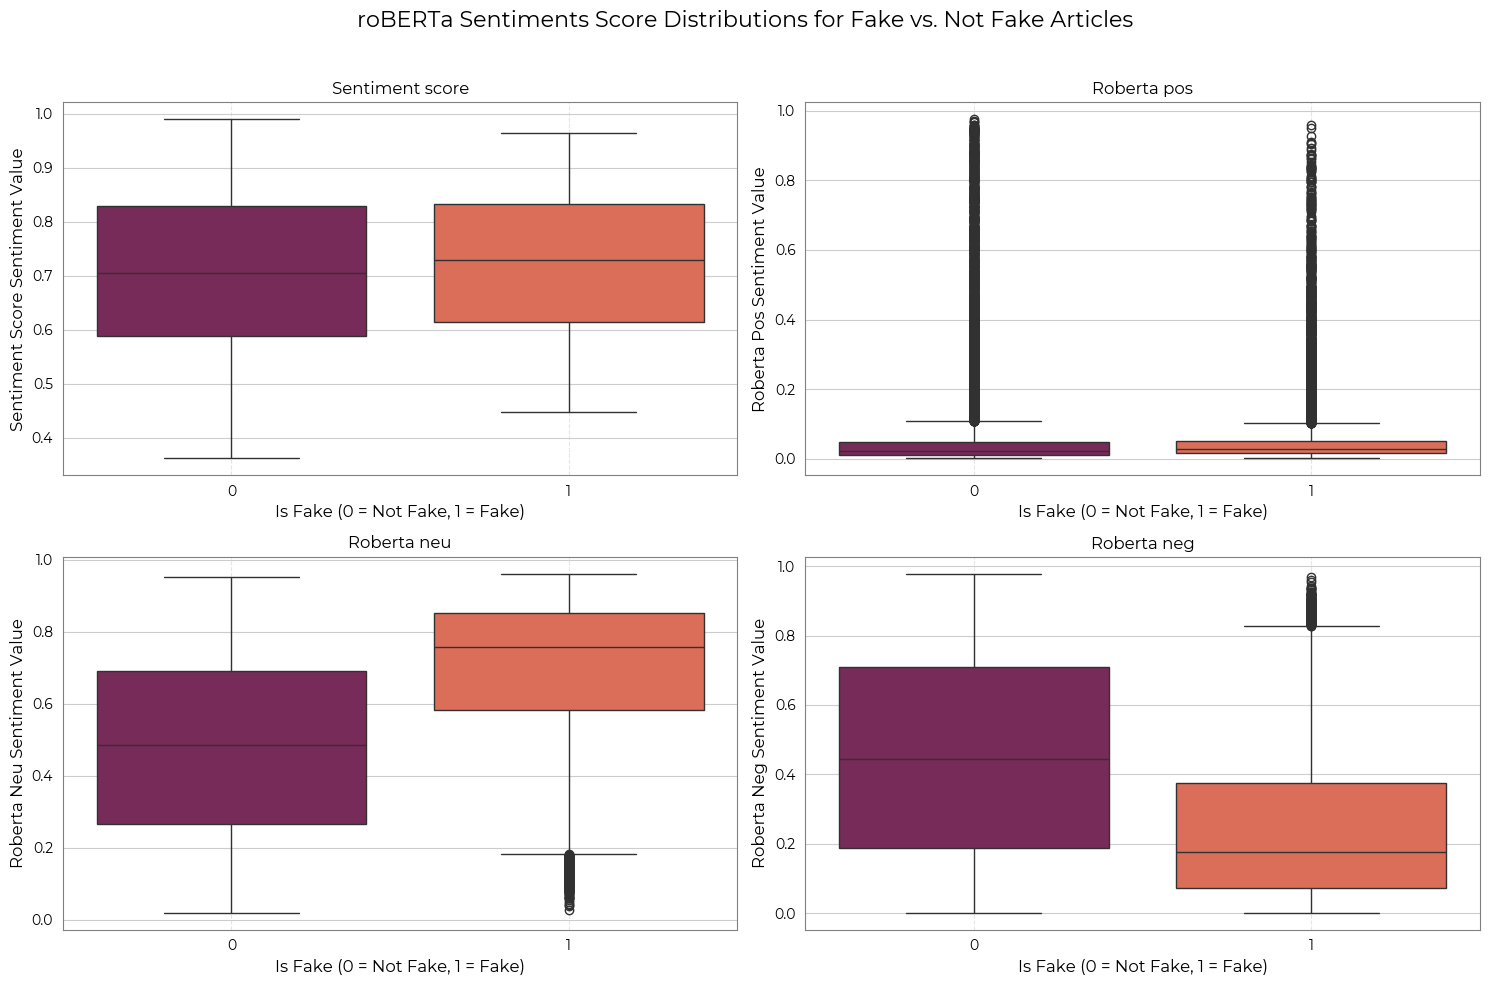

In [14]:
# Plot the roBERTa sentiment scores for the fake news DataFrames
eda.plot_sentiment_scores_for_fake_roberta(fake_news_dict_sent)

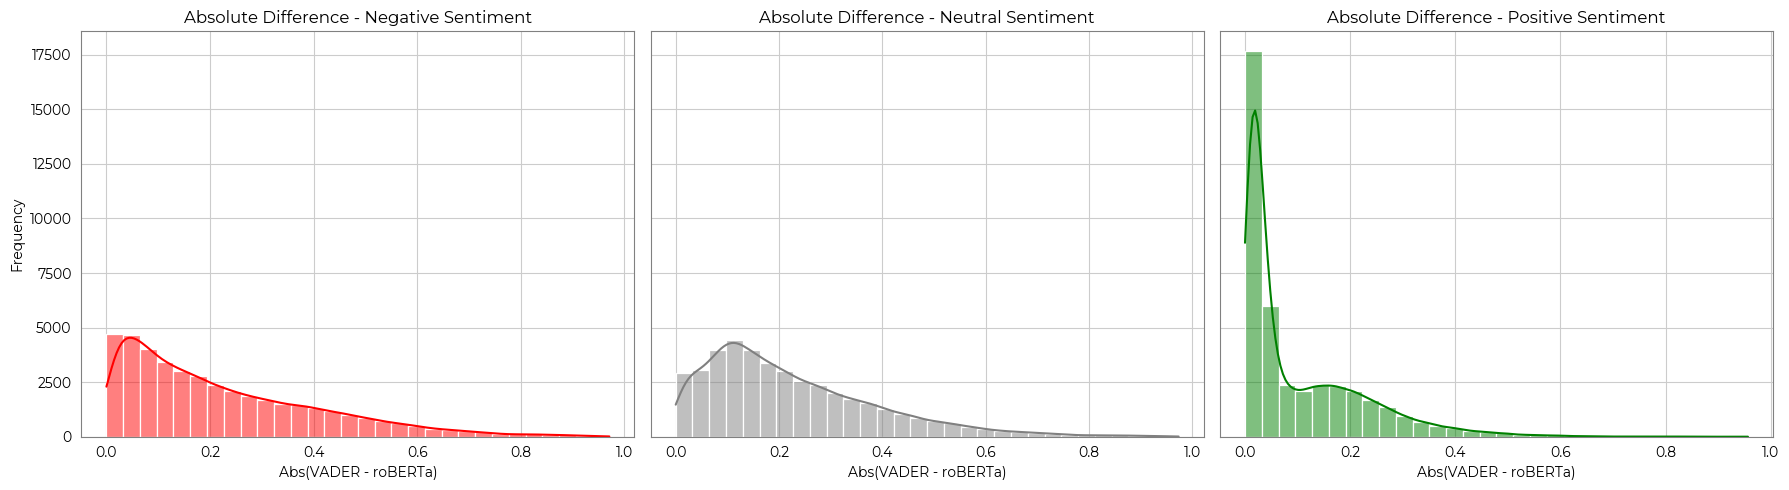

In [15]:
# Difference in Vader and roBERTa sentiment scores for the fake news DataFrames
eda.plot_sentiment_difference_histograms(fake_news_dict_sent, word='fake news')

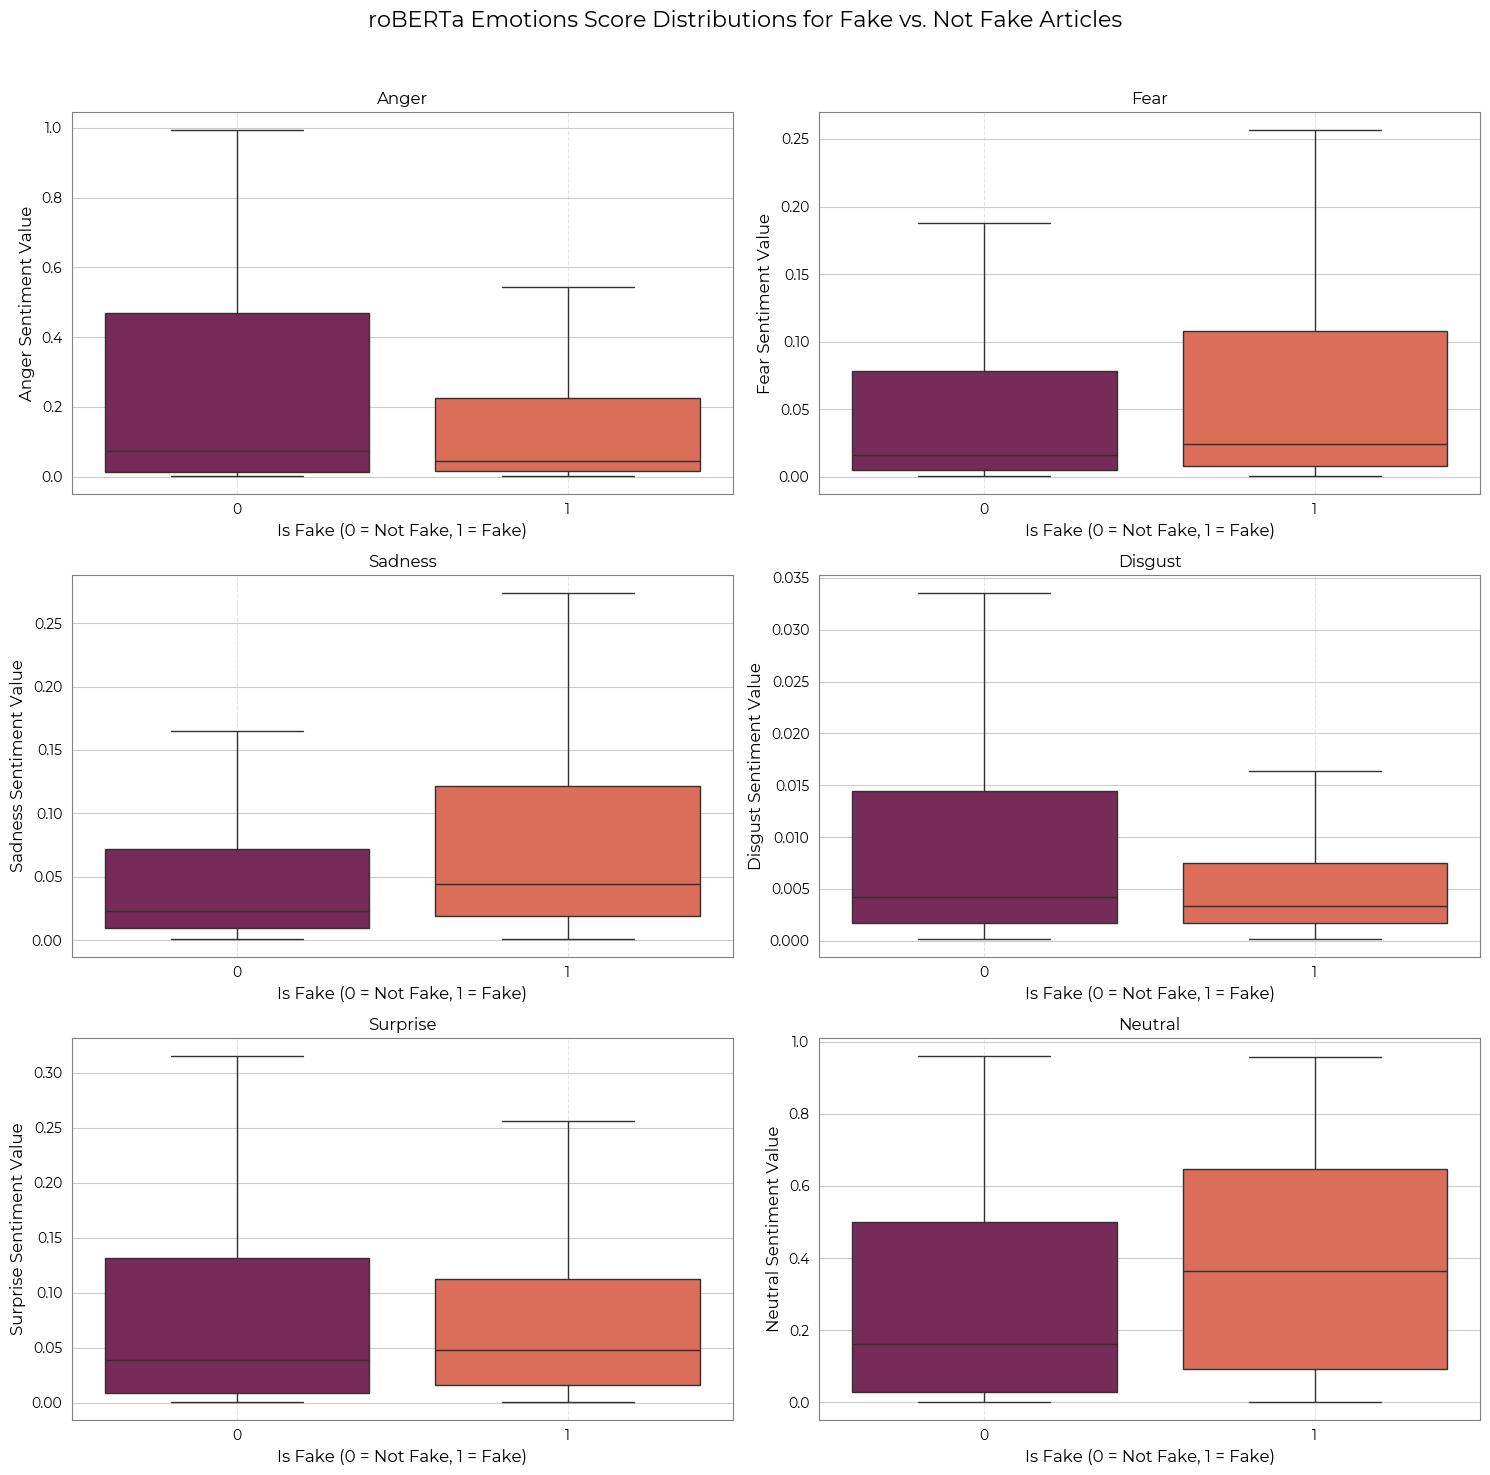

In [16]:
# Emotions distribution for the stocks news DataFrames
eda.plot_sentiment_scores_for_fake_roberta(fake_news_dict_sent, score_columns = ['anger', 'fear', 'sadness', 'disgust', 'surprise', 'neutral'], word='emotions', showfliers=False)

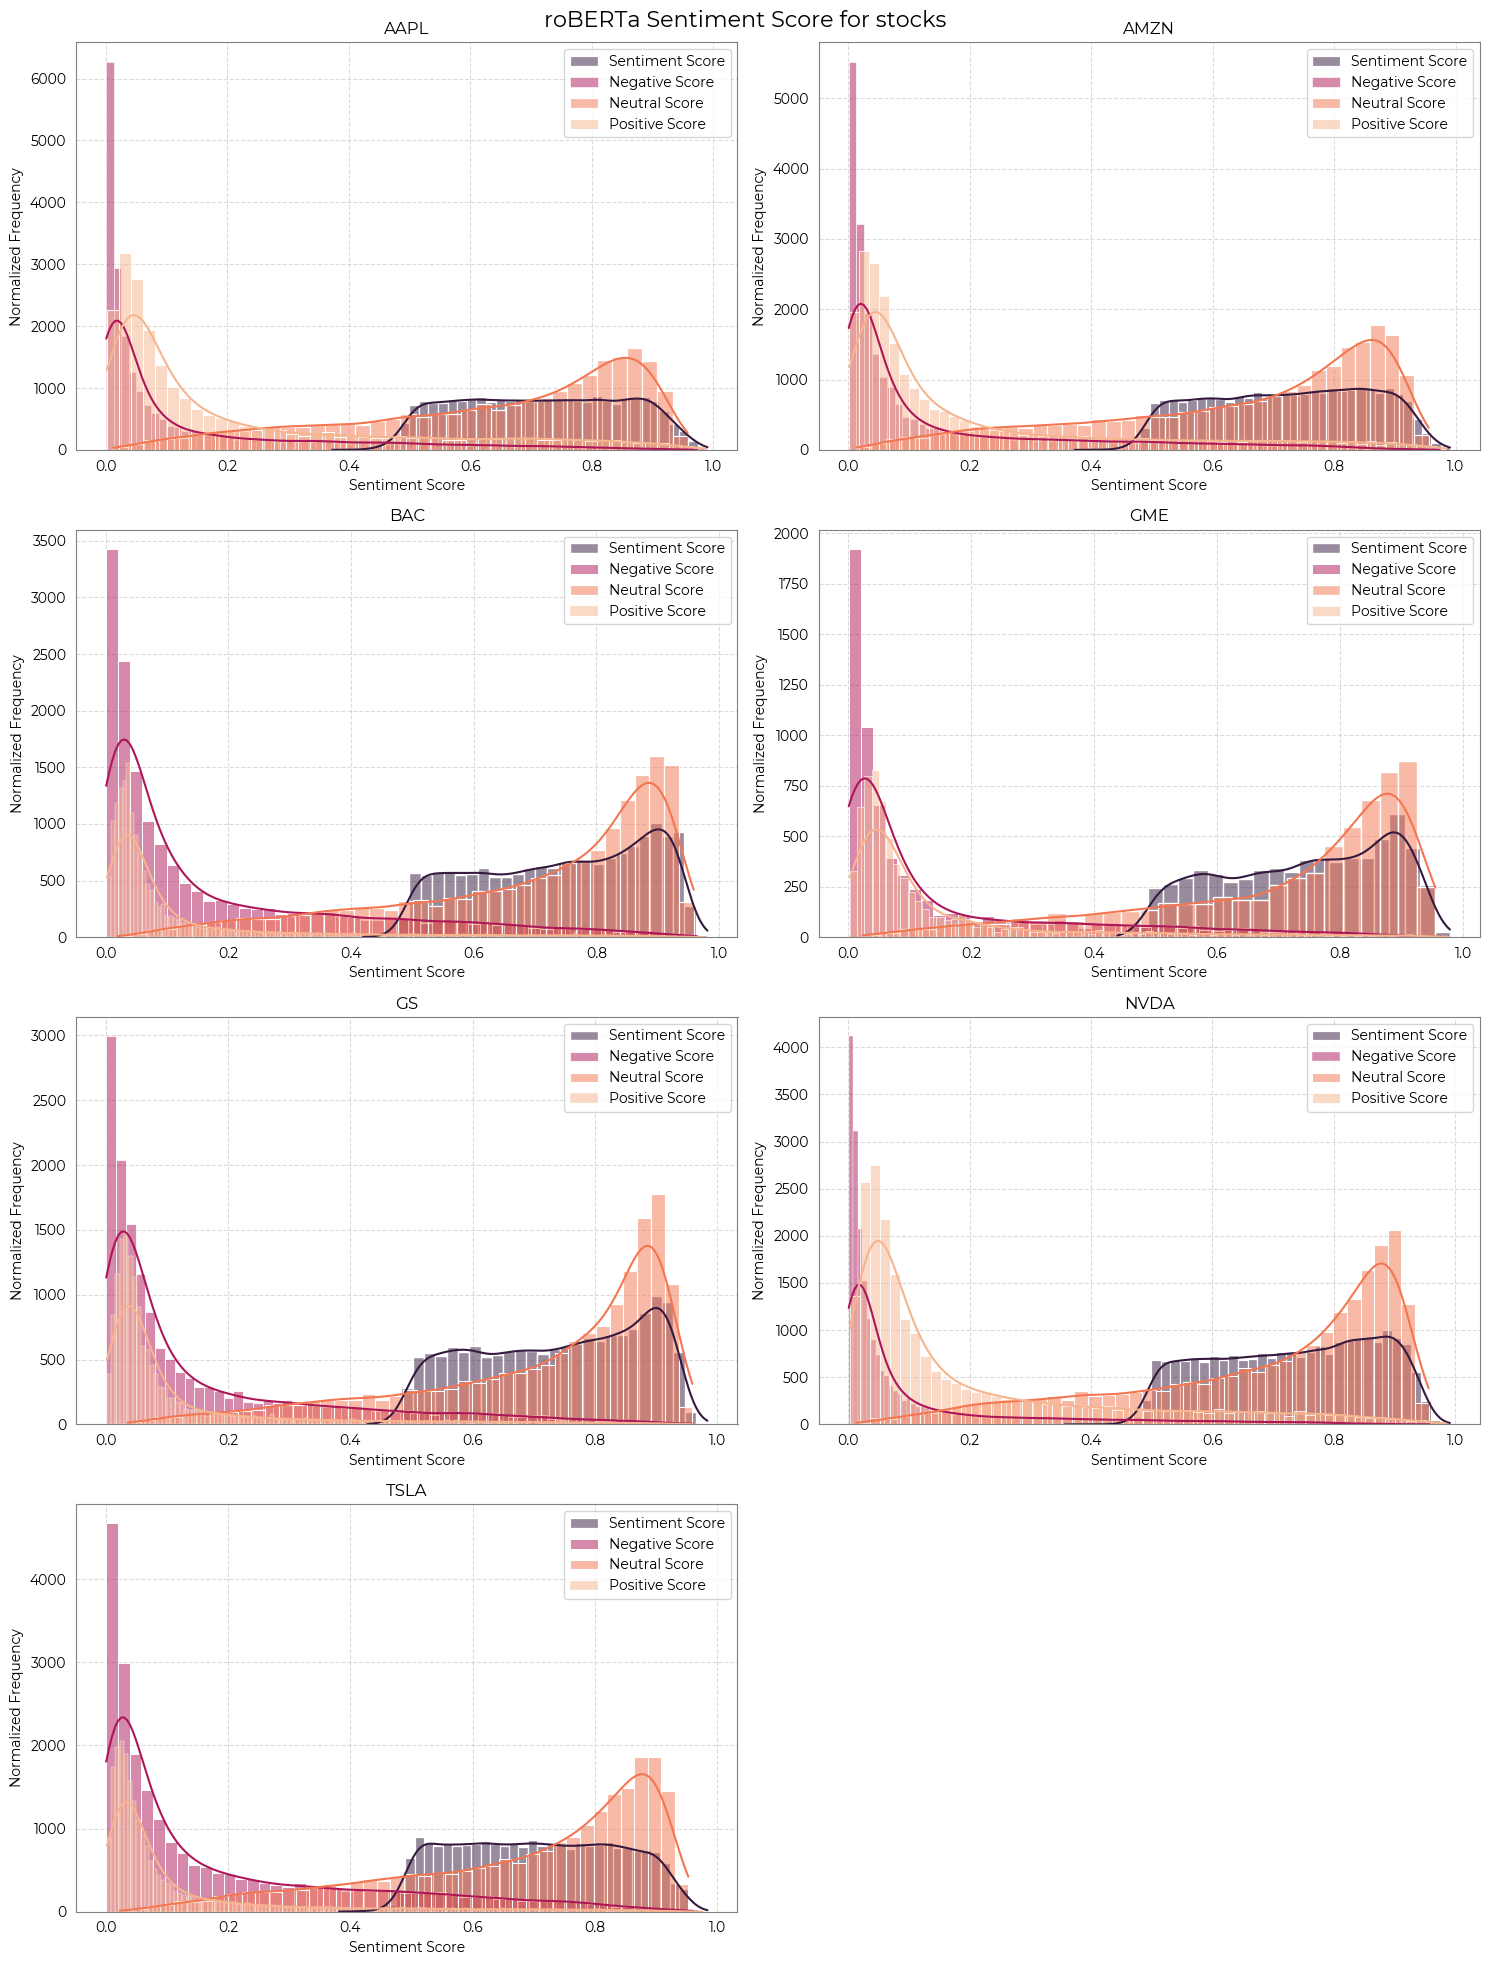

In [17]:
# roBERTa sentiments distibution for stock
eda.plot_sentiment_scores(news_dict_sent)

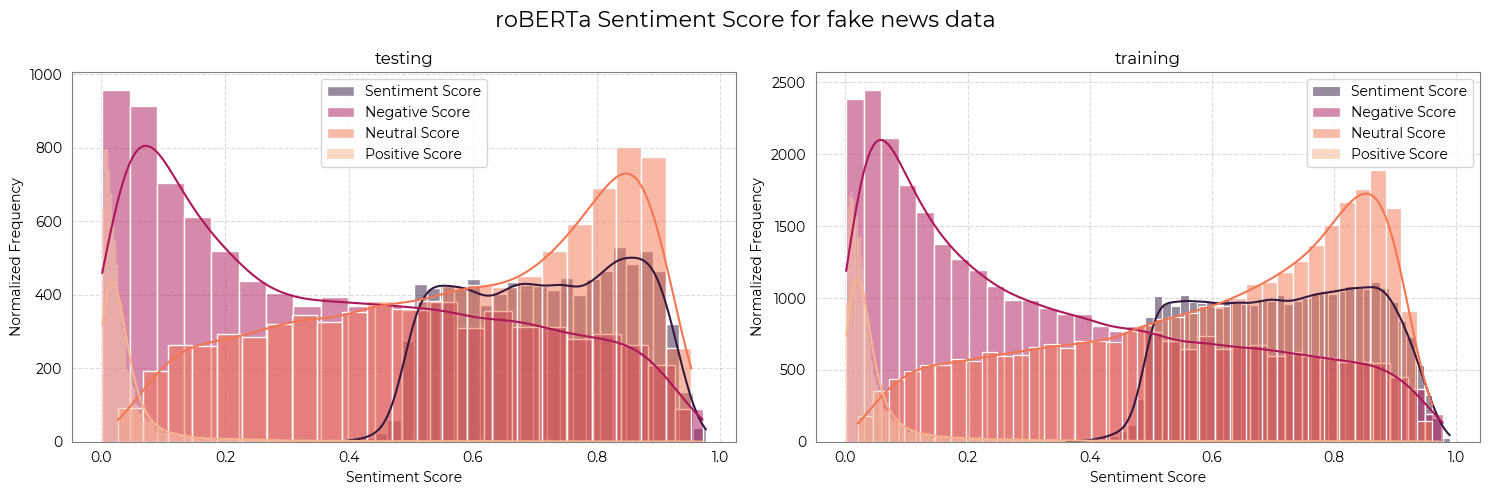

In [18]:
# roBERTa sentiments distibution for fske news datasets
eda.plot_sentiment_scores(fake_news_dict_sent, word = 'fake news data')

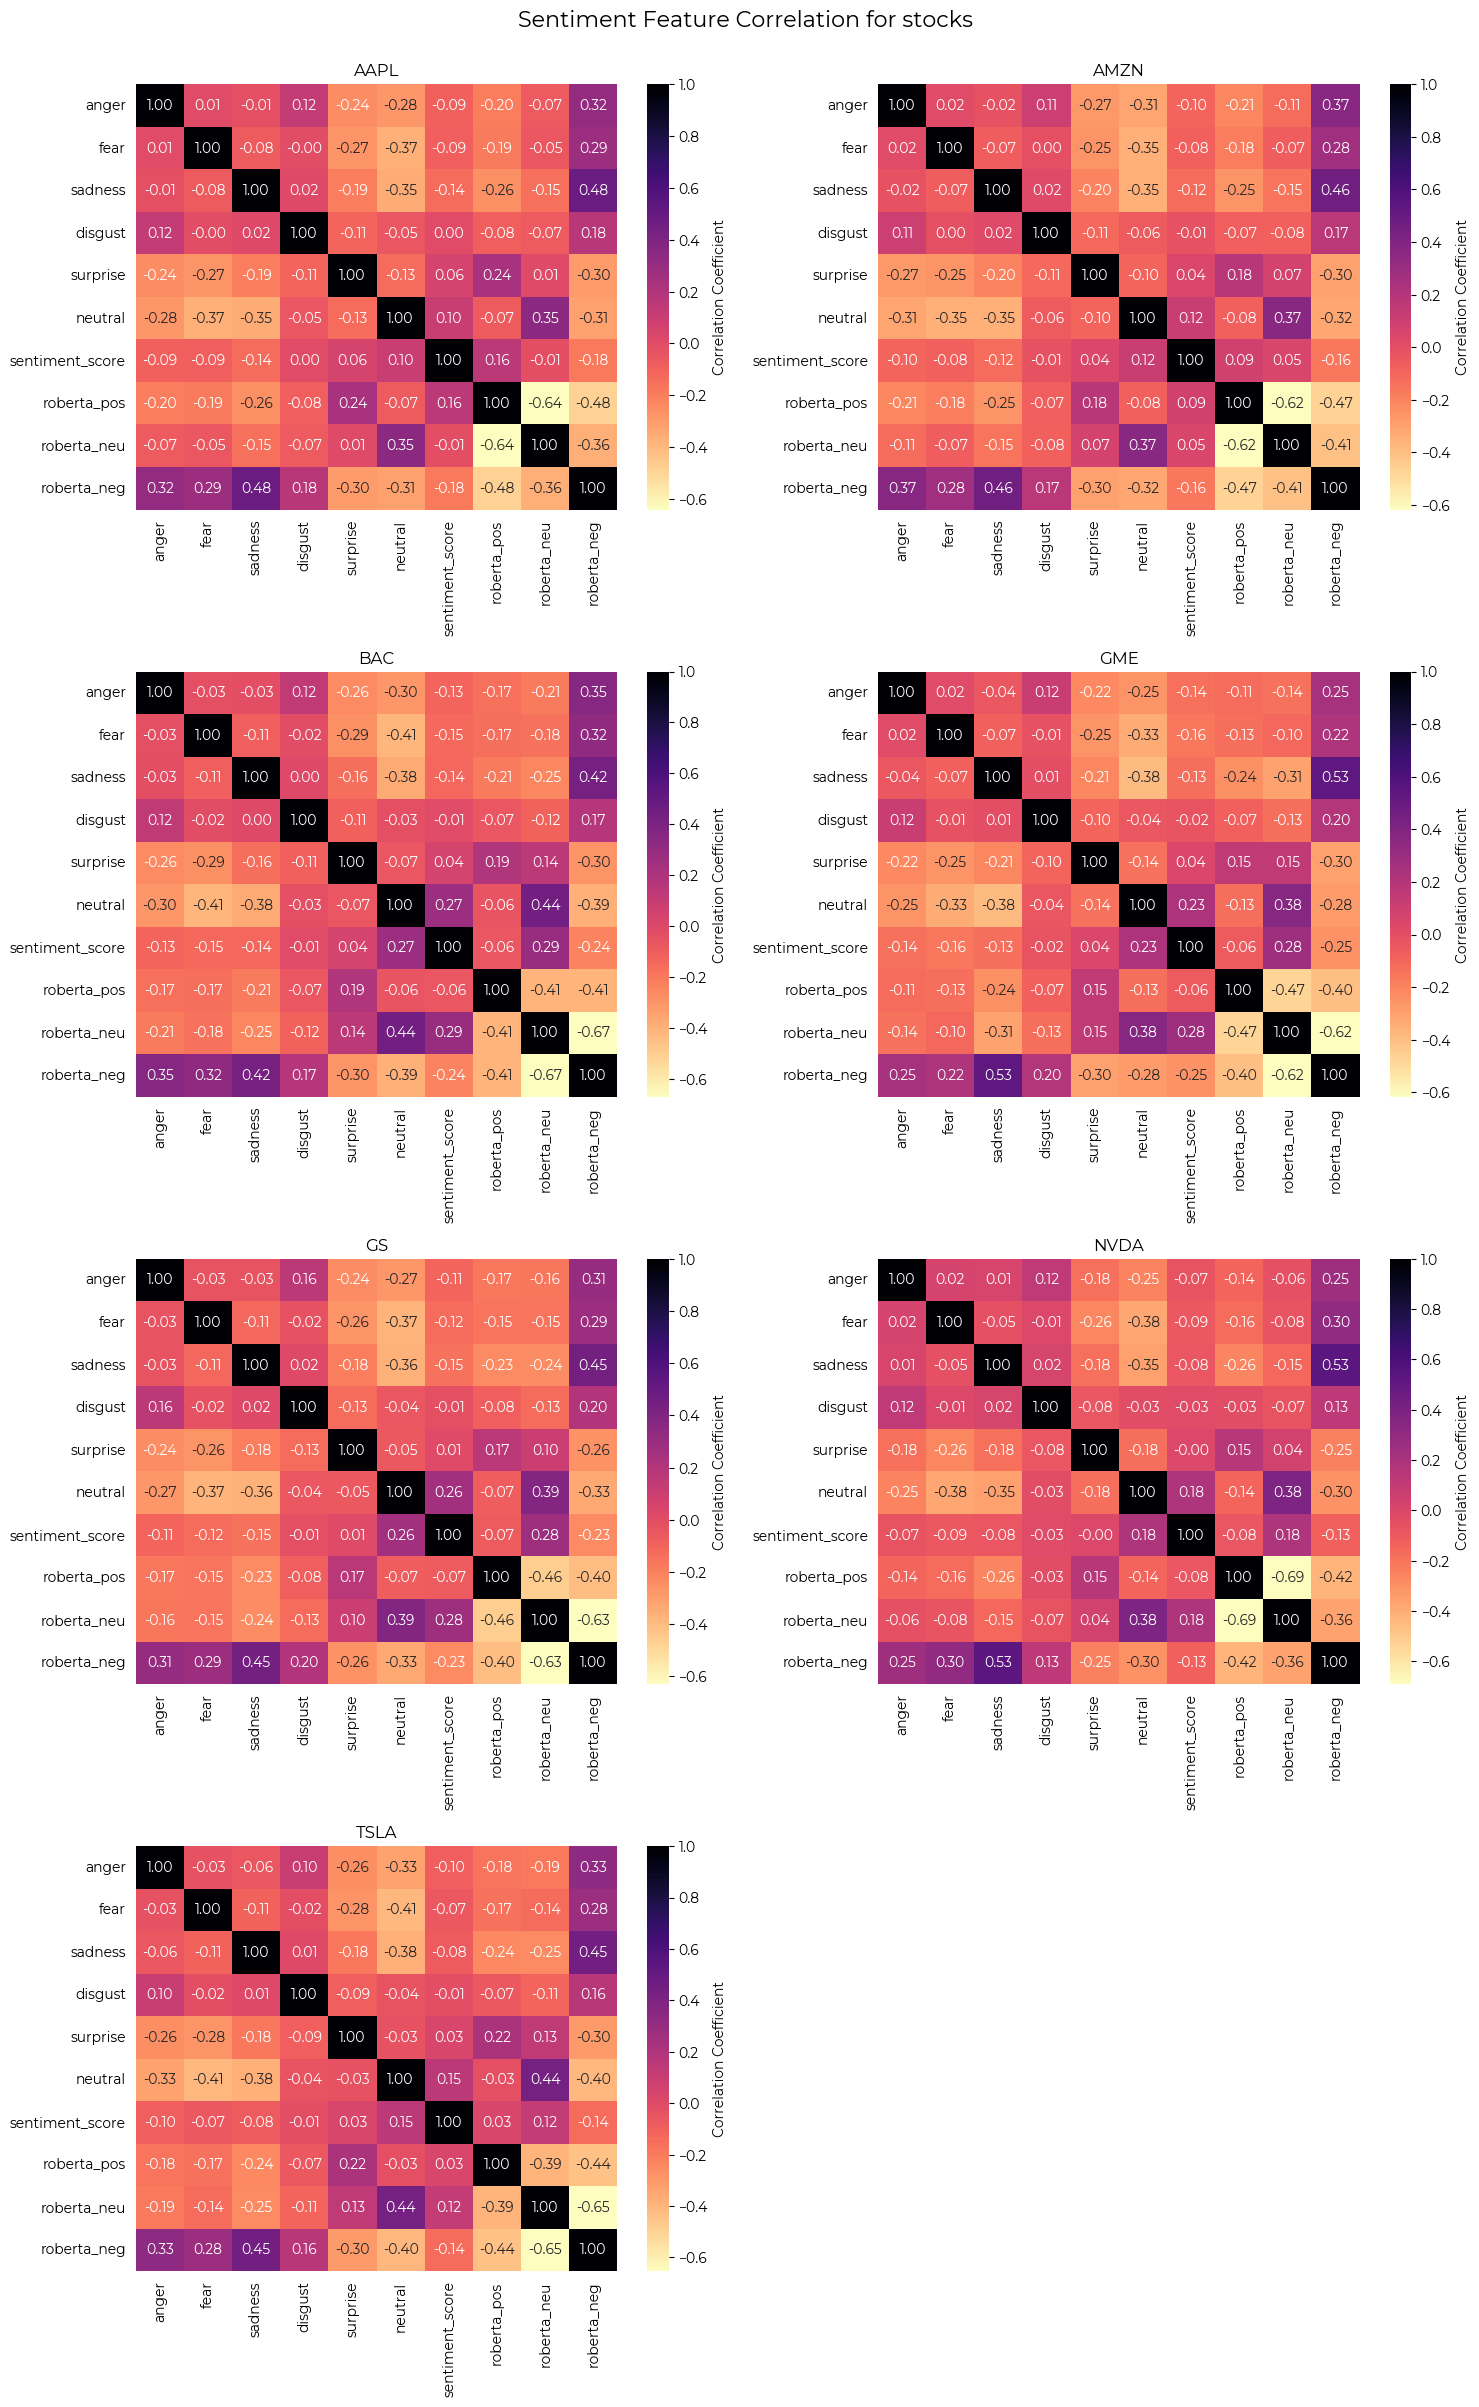

In [19]:
# Correlation between sentimensts for stocks
eda.plot_sentiment_corr(news_dict_sent)

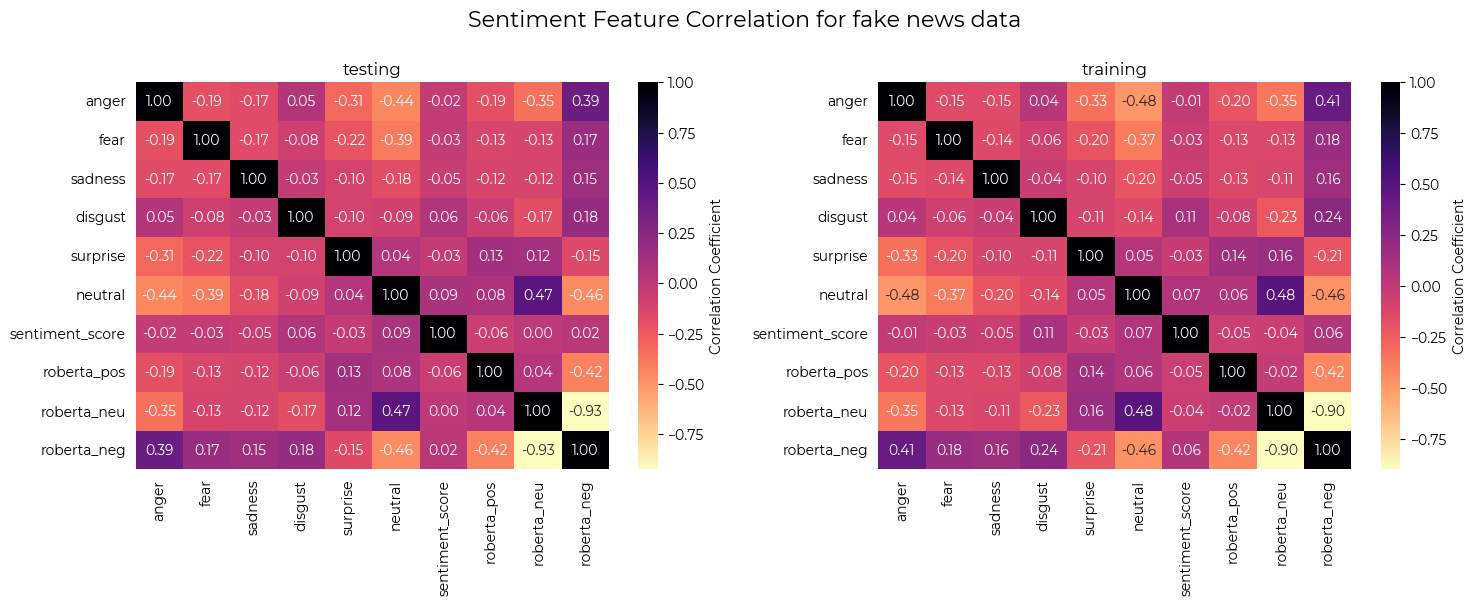

In [20]:
# Correlation between sentimensts for fake news
eda.plot_sentiment_corr(fake_news_dict_sent, word='fake news data')

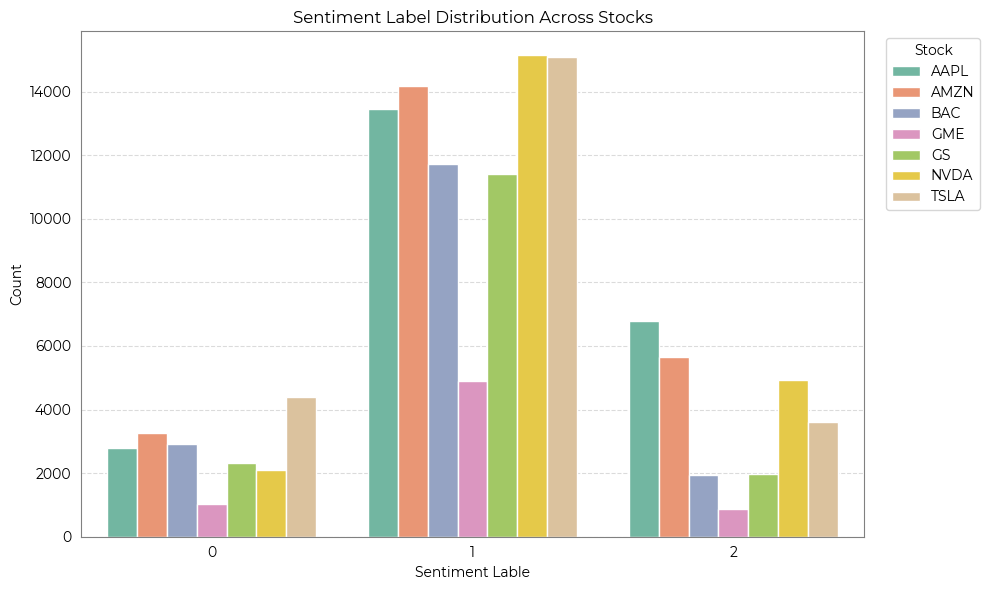

In [21]:
eda.plot_grouped_sentiment_distribution_for_stocks(news_dict_sent)

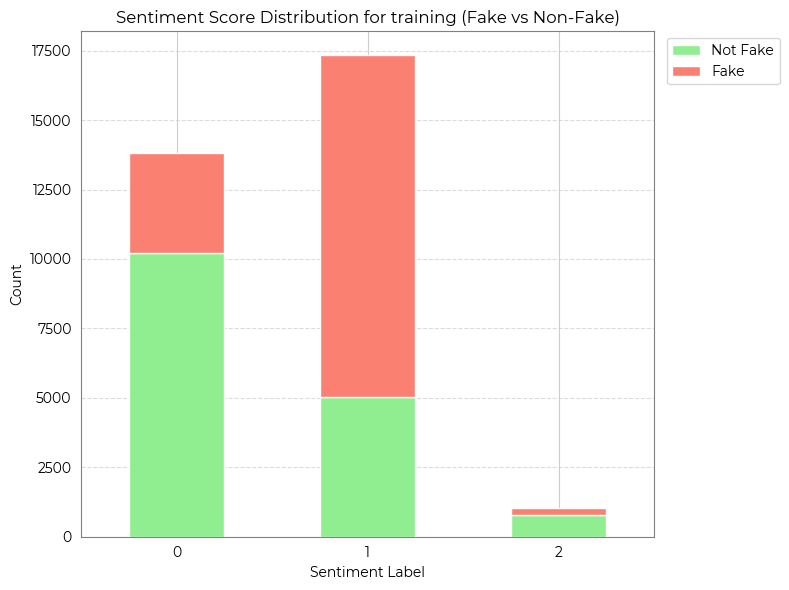

In [22]:
eda.plot_stacked_sentiment_distribution(fake_news_dict_sent)

### Embeddings

In [ ]:
# Data folder
data_folder = '../data/embeddings'

# Reading the dataset
news_dict_emb = nlp.load_dataframes_news_from_folder(data_folder, startswith = 'news_', key_place = 1, endswith = '_ready.csv')
fake_news_dict_emb = nlp.load_dataframes_fake_news_from_folder(data_folder, endswith = 'g_embedings_ready.csv', key_place = 2)

In [24]:
# Let's check the dataframes for missing values 
for key, df in news_dict_emb.items():
    print(f"Missing values in {key} dataframe:")
    ck.check_null(df)

for key, df in fake_news_dict_emb.items():
    print(f"Missing values in {key} dataframe:")
    ck.check_null(df)    

Missing values in AAPL dataframe:

Count of null values:
date                        0
title                       0
source                      0
text_column_tokens          0
text_without_puntutation    0
lemmatizers                 0
without_stop_words          0
text_column                 0
compound_score              0
positive_score              0
neutral_score               0
negative_score              0
roberta_neg                 0
roberta_neu                 0
roberta_pos                 0
roberta_sentiment           0
joy                         0
anger                       0
fear                        0
sadness                     0
disgust                     0
surprise                    0
neutral                     0
sentiment_label             0
sentiment_score             0
tfidf_embedding             0
tfidf_length                0
word2vec_embedding          0
word2vec_length             0
bert_embedding              0
bert_length                 0
elmo_embeddin

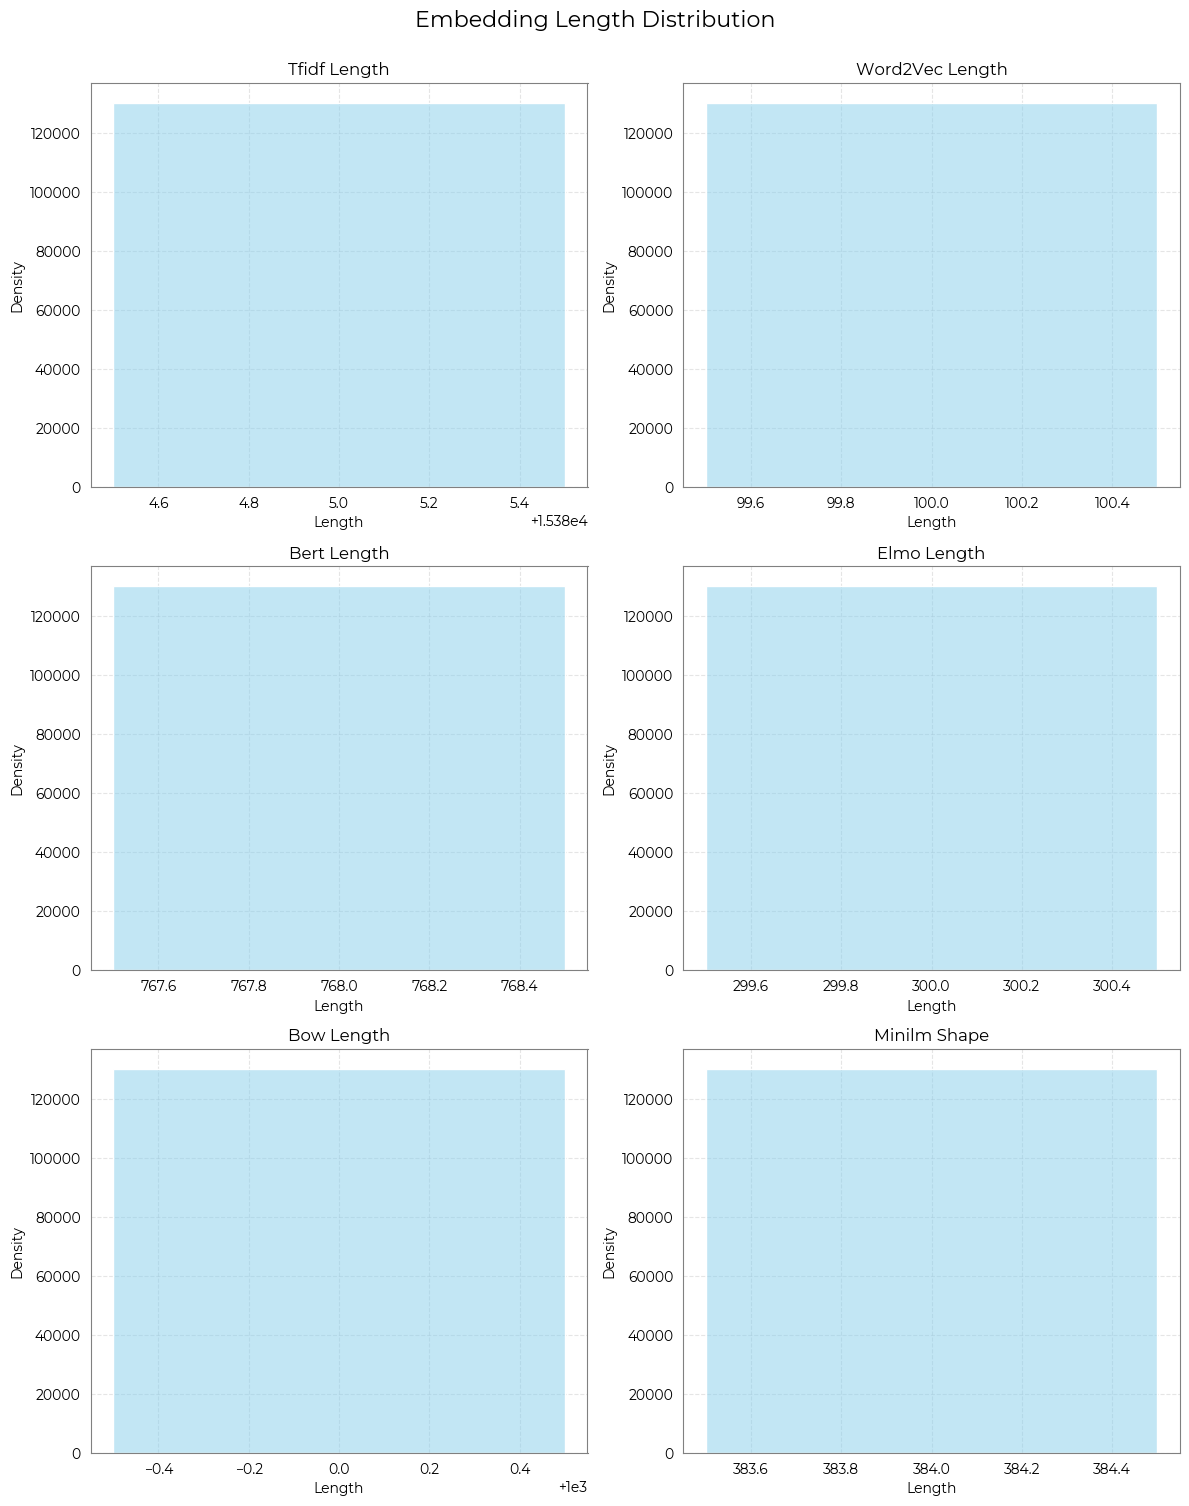

In [ ]:
# Embedings distribution for the stocks news DataFrames
length_columns = ['tfidf_length', 'word2vec_length', 'bert_length', 'elmo_length', 'bow_length', 'miniLM_shape']
eda.plot_embedding_lengths_per_model(news_dict_emb, length_columns = length_columns, word='stocks')

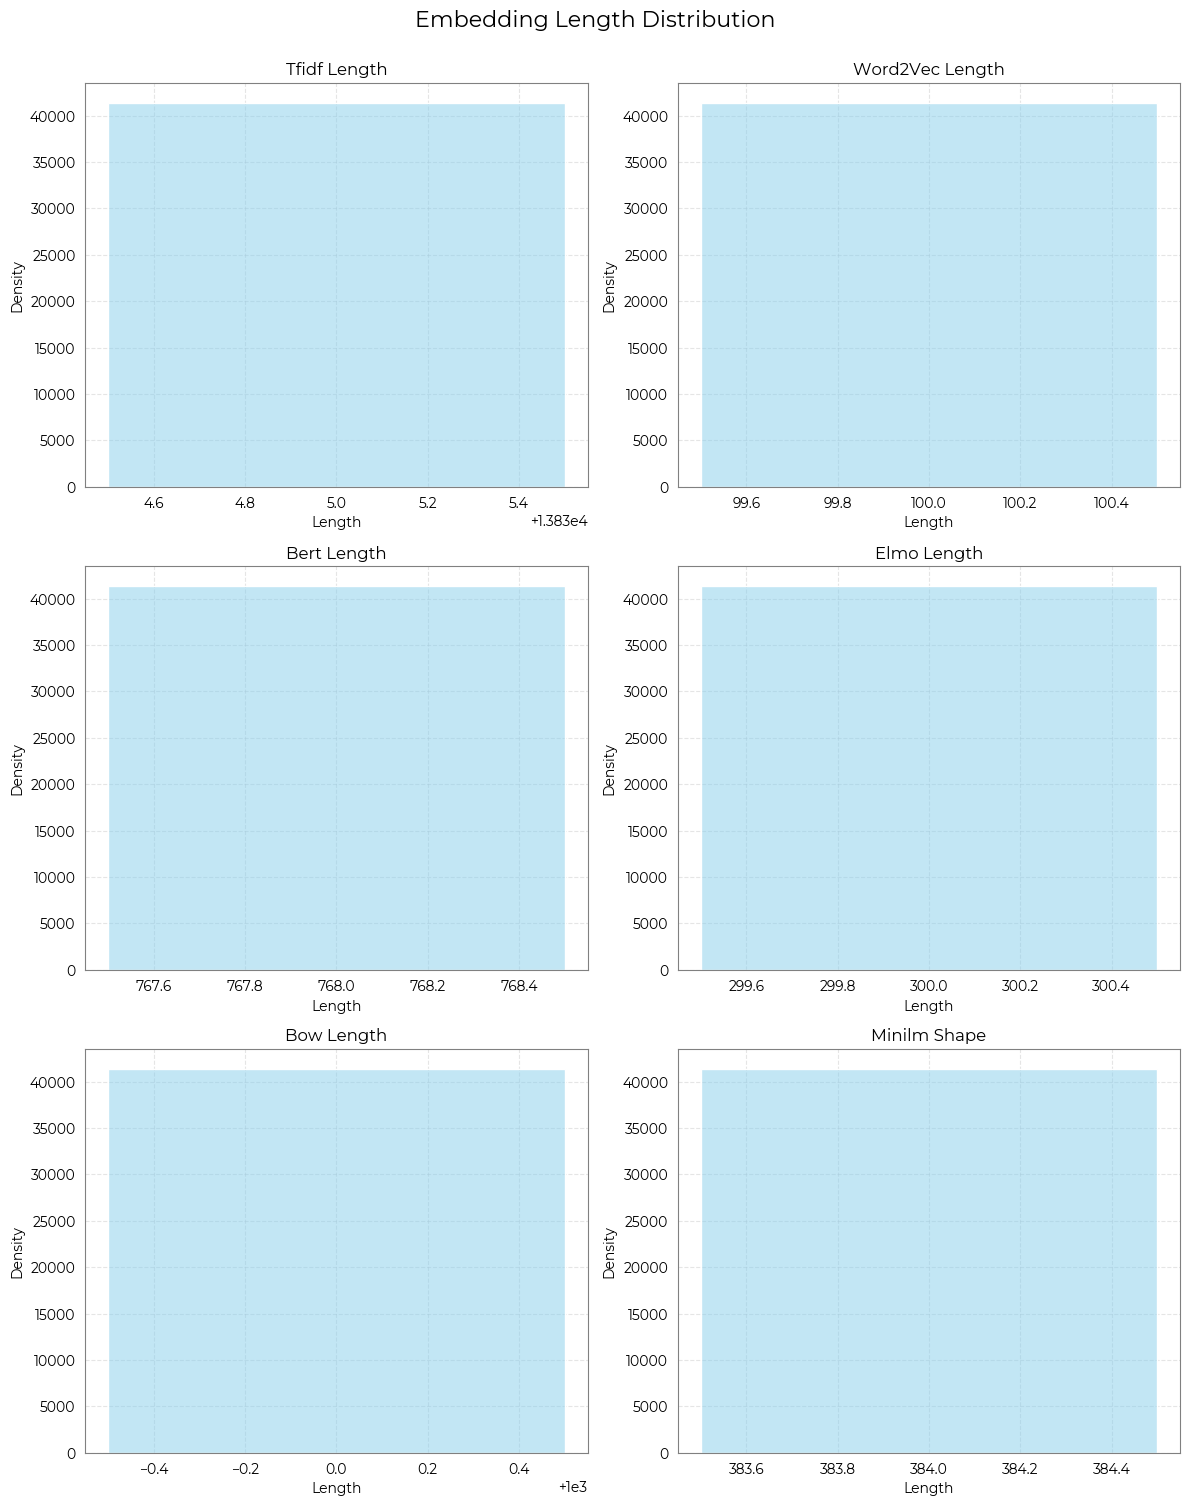

In [32]:
# Embedings distribution for the fake news DataFrames
length_columns = ['tfidf_length', 'word2vec_length', 'bert_length', 'elmo_length', 'bow_length', 'miniLM_shape']
eda.plot_embedding_lengths_per_model(fake_news_dict_emb, length_columns = length_columns, word='fake news data')

### Time series

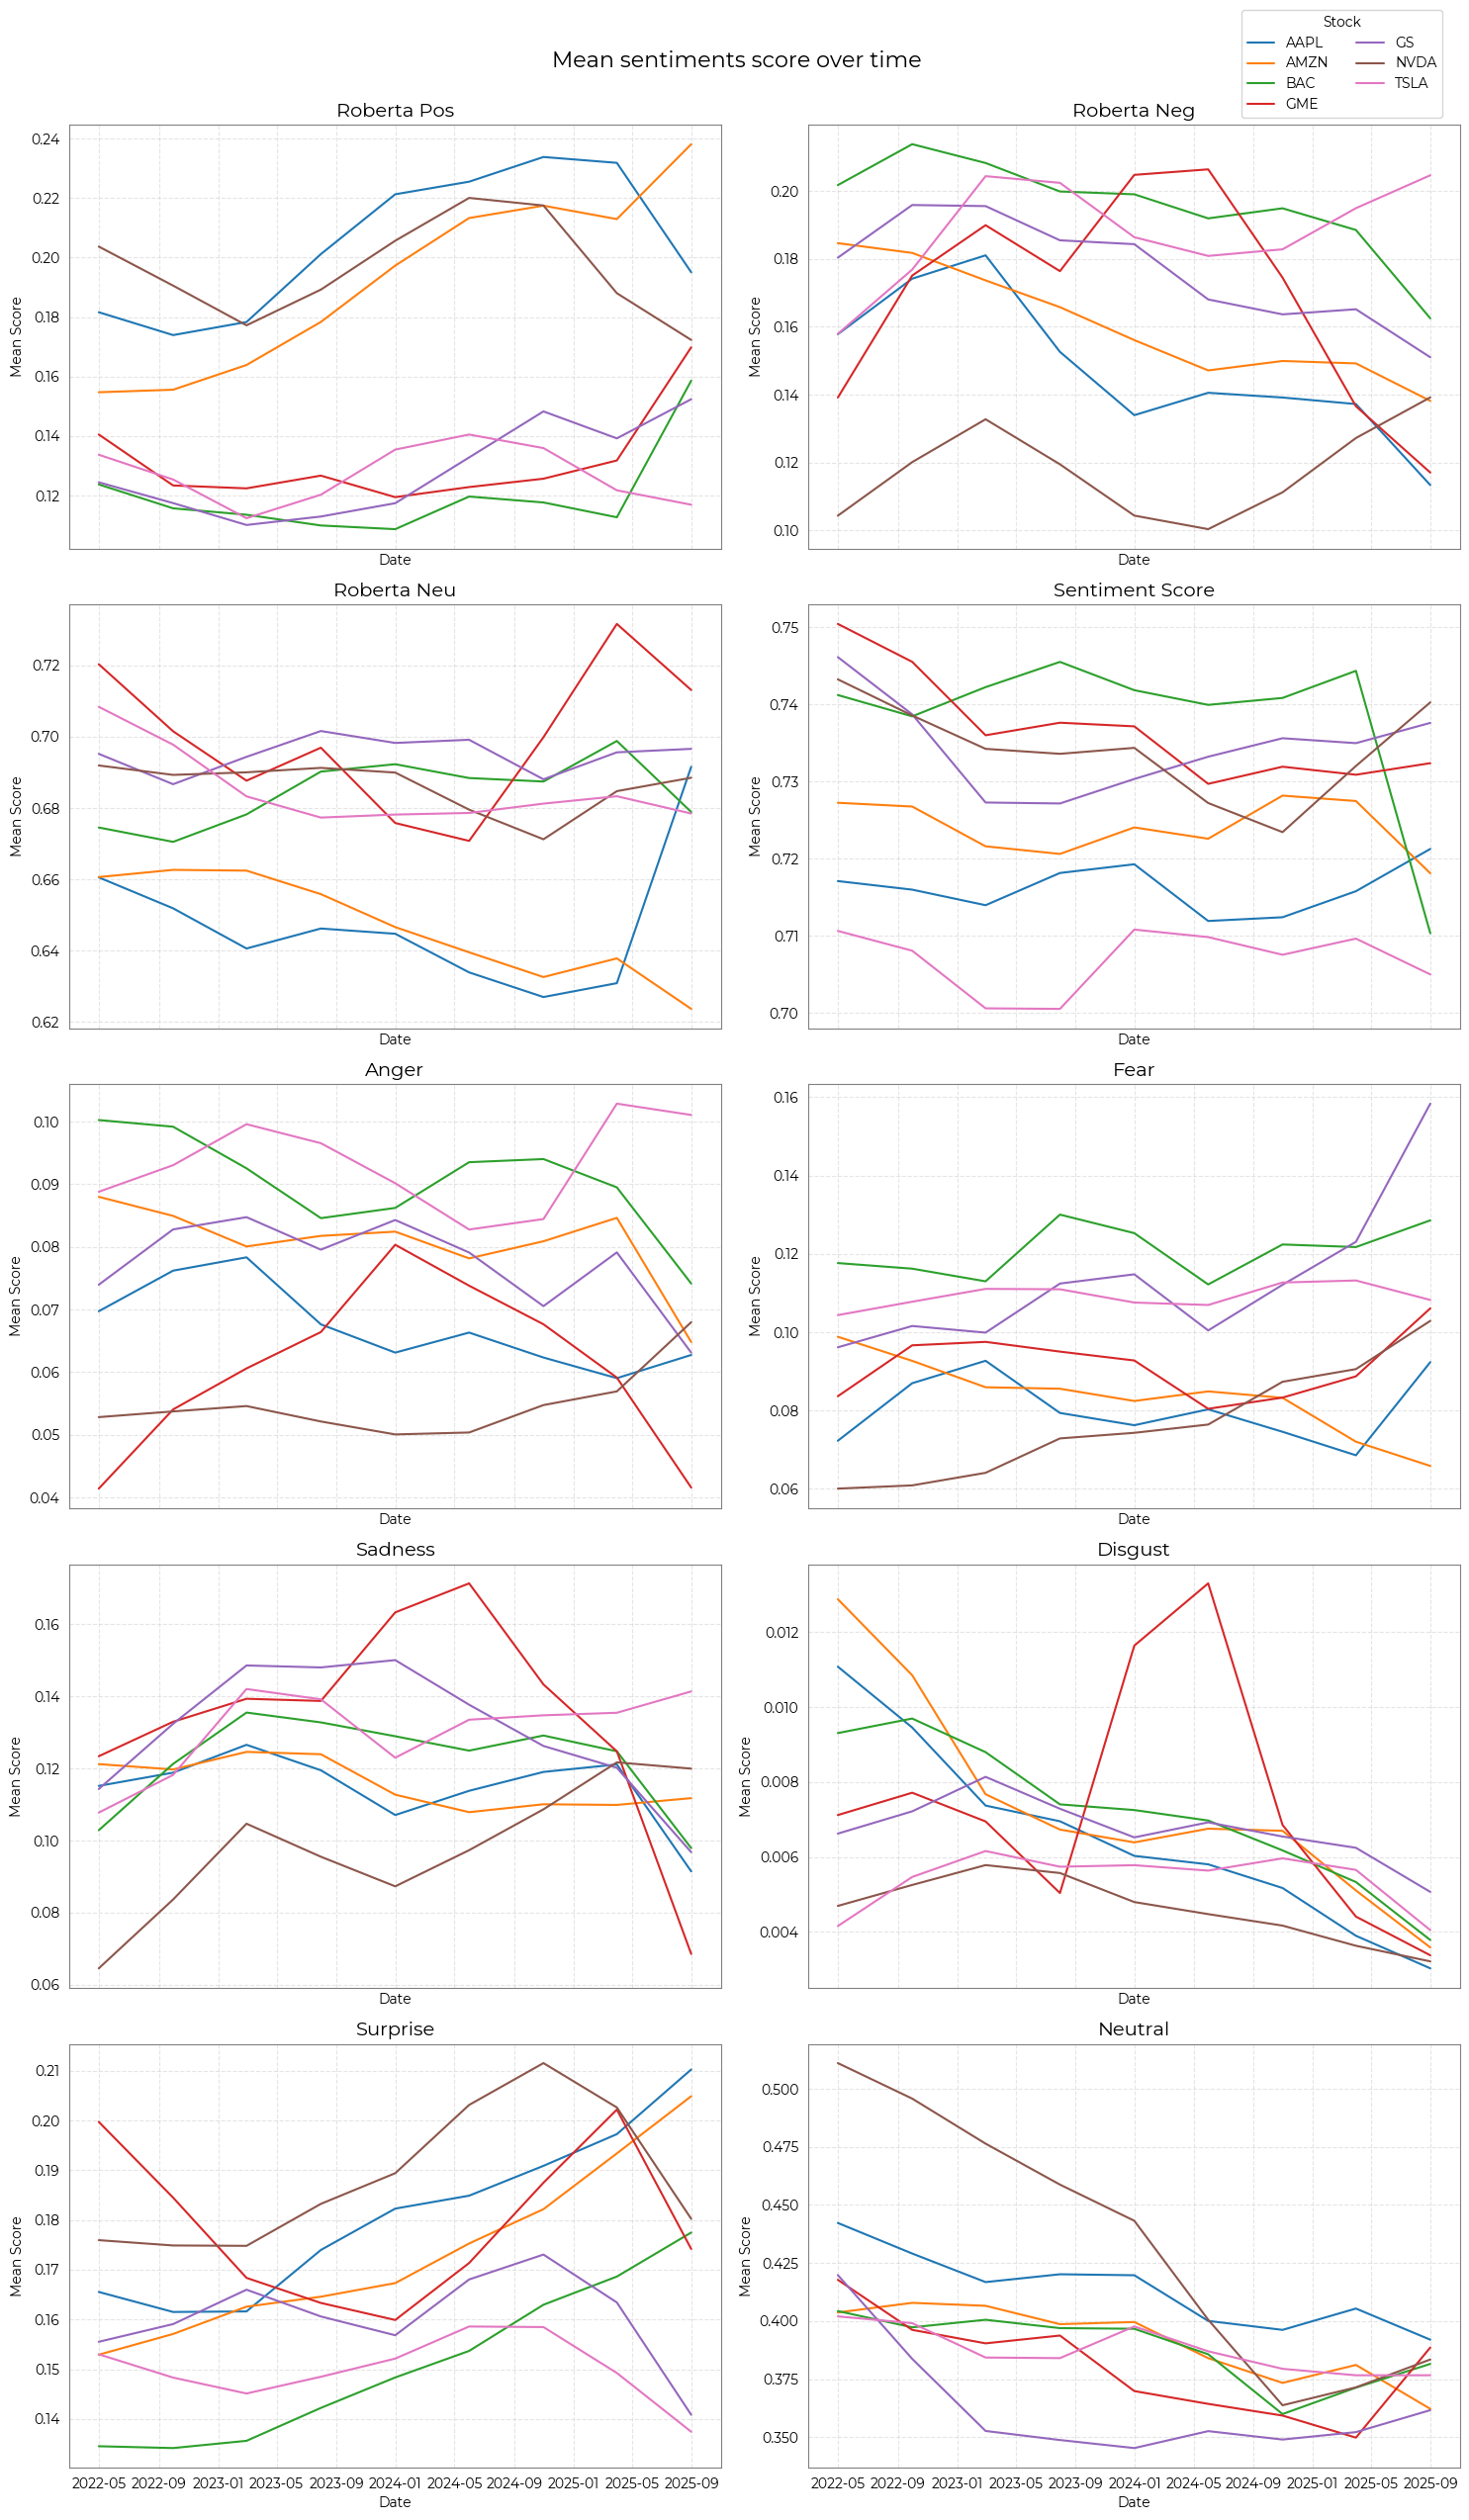

In [27]:
#
sentiment_columns = ['roberta_pos', 'roberta_neg', 'roberta_neu', 'sentiment_score', 'anger', 'fear', 'sadness', 'disgust', 'surprise', 'neutral']
eda. plot_sentiment_over_time(news_dict_sent, sentiment_columns=sentiment_columns, time_column='date')

In [2]:
# Data folder
data_folder = '../data/data_cleaned'

# Reading the dataset
news_dict_stocks = nlp.load_dataframes_news_from_folder(data_folder, startswith = 'stocks_', key_place = 3, endswith = 'yahoo.csv')

In [3]:
news_dict_stocks.keys()

dict_keys(['AAPL', 'AMZN', 'BAC', 'GME', 'GS', 'NVDA', 'TSLA'])

In [6]:
news_dict_stocks['AAPL'].head(2)

date       close        high         low        open     volume
0  2022-05-09  149.855240  153.570582  149.293512  152.683622  131577900
1  2022-05-10  152.269684  154.467361  150.712591  153.265049  115366700

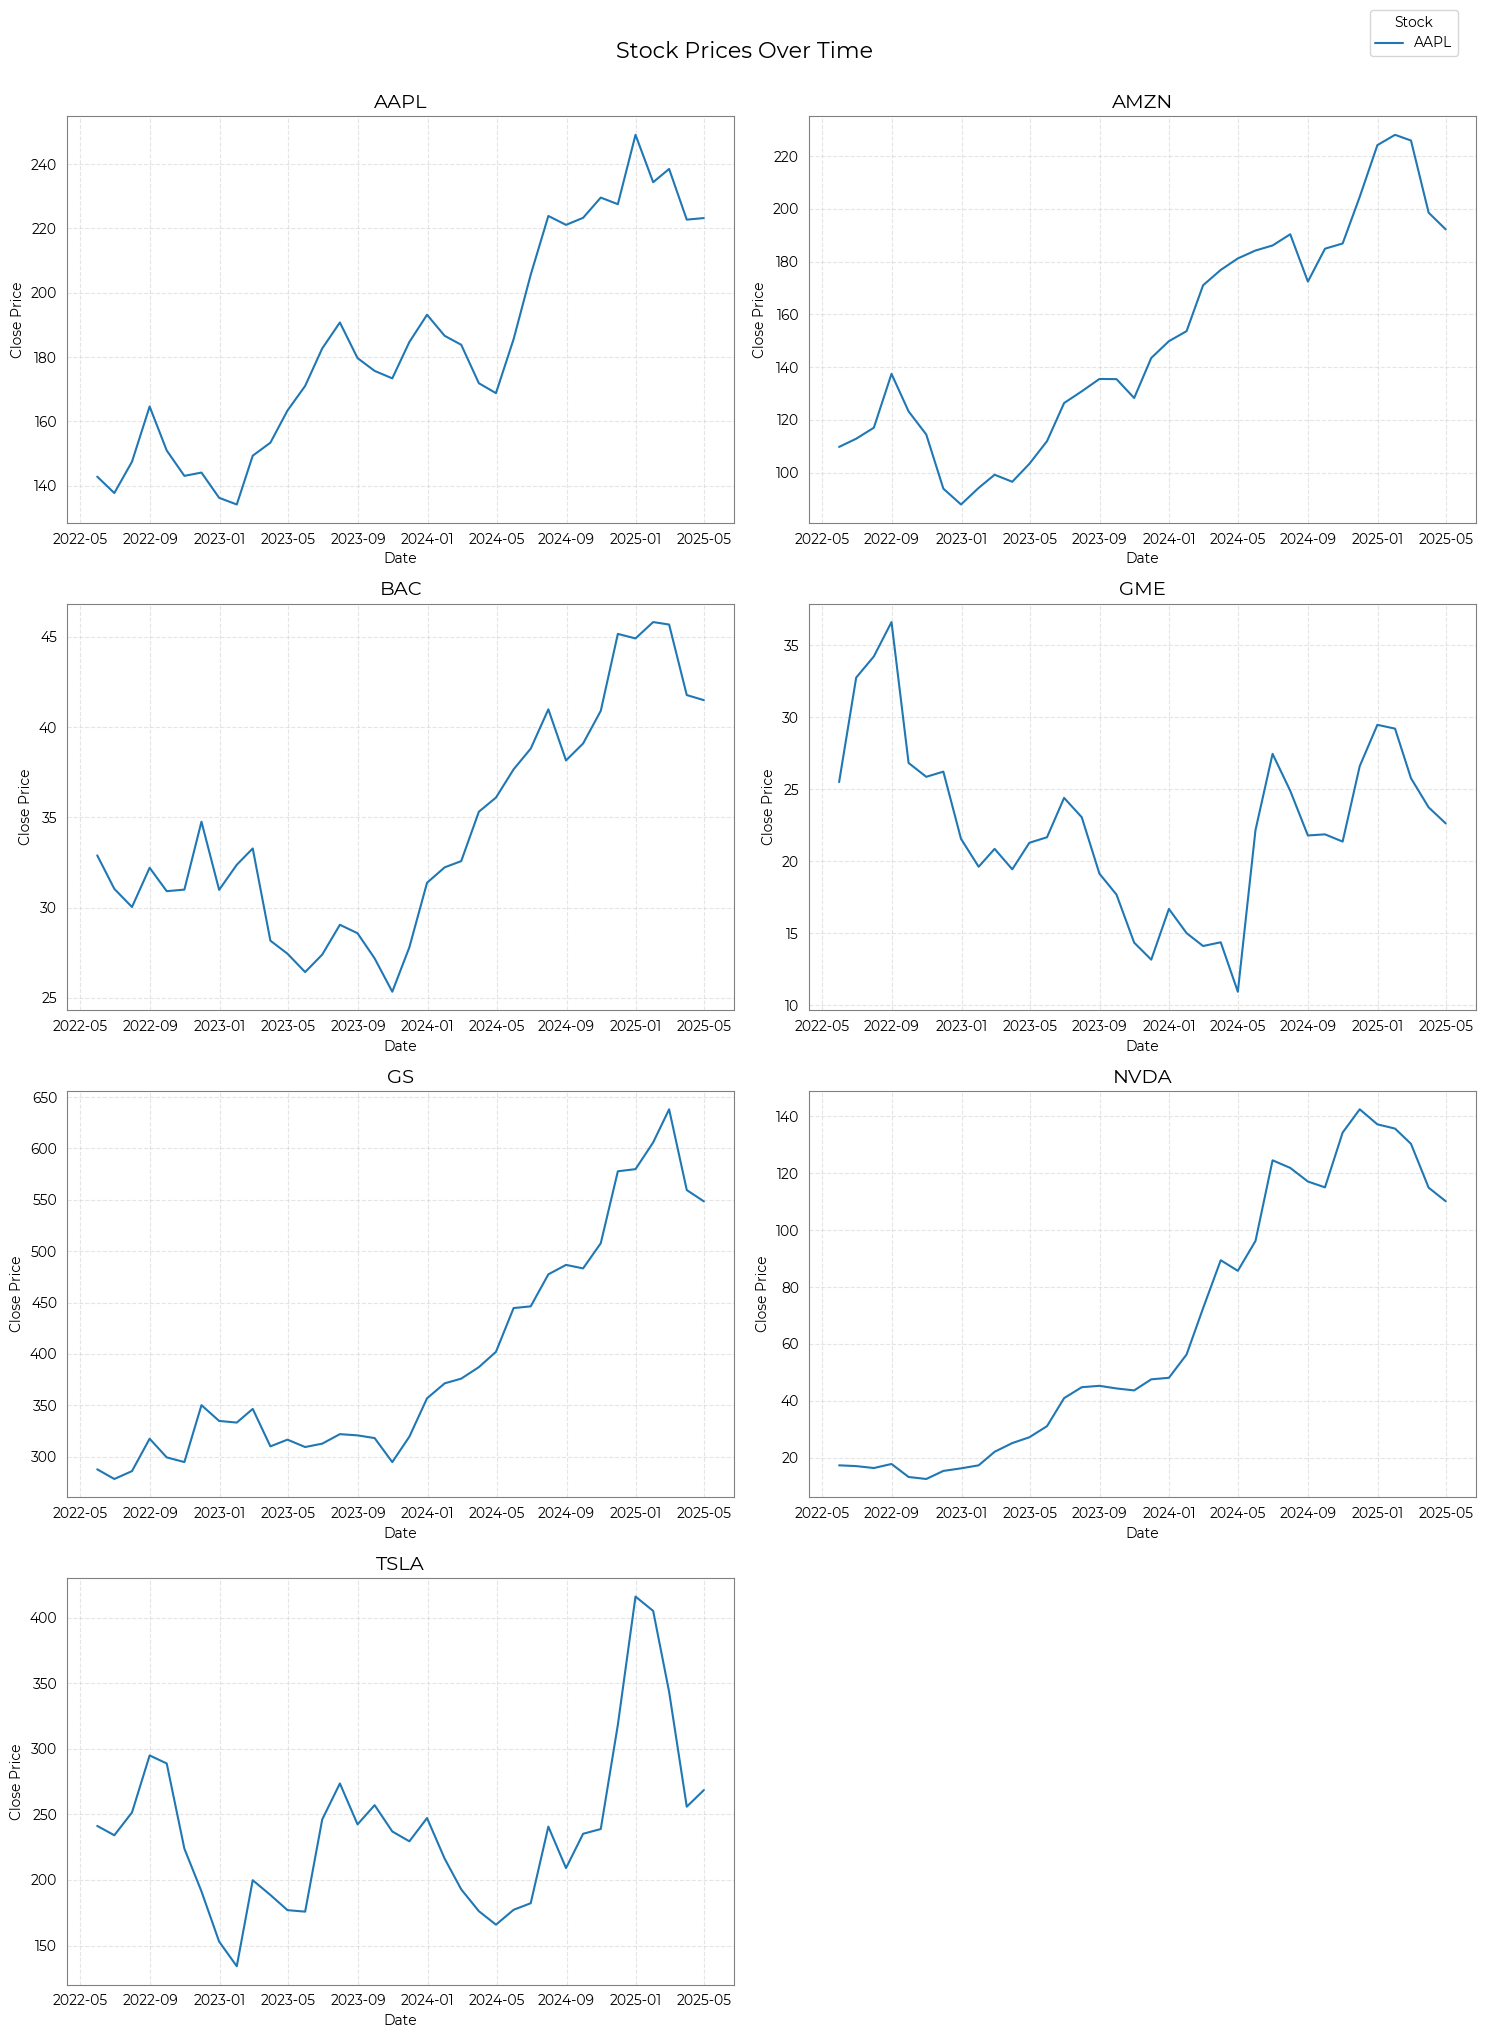

In [7]:
# Stock prices over time
eda.plot_stock_prices_over_time(news_dict_stocks, time_column='date', price_column='close')